In [23]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [77]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
df=pd.read_csv(r'C:\Users\HP\Downloads\afa2e701598d20110228.csv',sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [33]:
df.shape

(2861, 11)

In [14]:
df.describe()

id          NH4         BSK5    Suspended           O2  \
count  2861.000000  2858.000000  2860.000000  2845.000000  2858.000000   
mean     12.397064     0.758734     4.316182    12.931905     9.508902   
std       6.084226     2.486247     2.973997    16.543097     4.428260   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       8.000000     0.080000     2.160000     6.000000     7.092500   
50%      14.000000     0.220000     3.800000    10.000000     8.995000   
75%      16.000000     0.500000     5.800000    15.000000    11.520000   
max      22.000000    39.427000    50.900000   595.000000    90.000000   

               NO3          NO2          SO4          PO4           CL  
count  2860.000000  2858.000000  2812.000000  2833.000000  2812.000000  
mean      4.316846     0.246128    59.362313     0.418626    93.731991  
std       6.881188     2.182777    96.582641     0.771326   394.512184  
min       0.000000     0.000000     0.000000     0.000000     0.020000  
25%       1.390000     0.030000    27.052500     0.130000    26.800000  
50%       2.800000     0.059000    37.800000     0.270000    33.900000  
75%       5.582500     0.125750    64.640000     0.470000    45.607500  
max     133.400000   109.000000  3573.400000    13.879000  5615.280000

In [16]:
df.min()

id                    1
date         01.02.2000
NH4                 0.0
BSK5                0.0
Suspended           0.0
O2                  0.0
NO3                 0.0
NO2                 0.0
SO4                 0.0
PO4                 0.0
CL                 0.02
dtype: object

In [35]:
df.describe().T

count       mean         std   min      25%     50%       75%  \
id         2861.0  12.397064    6.084226  1.00   8.0000  14.000  16.00000   
NH4        2858.0   0.758734    2.486247  0.00   0.0800   0.220   0.50000   
BSK5       2860.0   4.316182    2.973997  0.00   2.1600   3.800   5.80000   
Suspended  2845.0  12.931905   16.543097  0.00   6.0000  10.000  15.00000   
O2         2858.0   9.508902    4.428260  0.00   7.0925   8.995  11.52000   
NO3        2860.0   4.316846    6.881188  0.00   1.3900   2.800   5.58250   
NO2        2858.0   0.246128    2.182777  0.00   0.0300   0.059   0.12575   
SO4        2812.0  59.362313   96.582641  0.00  27.0525  37.800  64.64000   
PO4        2833.0   0.418626    0.771326  0.00   0.1300   0.270   0.47000   
CL         2812.0  93.731991  394.512184  0.02  26.8000  33.900  45.60750   

                max  
id           22.000  
NH4          39.427  
BSK5         50.900  
Suspended   595.000  
O2           90.000  
NO3         133.400  
NO2         109.000  
SO4        3573.400  
PO4          13.879  
CL         5615.280

In [22]:
df.isnull()

id   date    NH4   BSK5  Suspended     O2    NO3    NO2    SO4  \
0     False  False  False  False      False  False  False  False  False   
1     False  False  False  False      False  False  False  False  False   
2     False  False  False  False      False  False  False  False  False   
3     False  False  False  False      False  False  False  False  False   
4     False  False  False  False      False  False  False  False  False   
...     ...    ...    ...    ...        ...    ...    ...    ...    ...   
2856  False  False  False  False      False  False  False  False  False   
2857  False  False  False  False      False  False  False  False  False   
2858  False  False  False  False      False  False  False  False  False   
2859  False  False  False  False      False  False  False  False  False   
2860  False  False  False  False      False  False  False  False  False   

        PO4     CL  
0     False  False  
1     False  False  
2     False  False  
3     False  False  
4     False  False  
...     ...    ...  
2856  False  False  
2857  False  False  
2858  False  False  
2859  False  False  
2860  False  False  

[2861 rows x 11 columns]

In [24]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [26]:
df.head()

id        date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1  17.02.2000  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1  11.05.2000  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1  11.09.2000  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1  13.12.2000  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1  02.03.2001  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   

       CL  
0   289.5  
1  1792.0  
2  2509.0  
3  1264.0  
4  1462.0

In [28]:
df.head(8)

id        date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1  17.02.2000  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1  11.05.2000  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1  11.09.2000  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1  13.12.2000  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1  02.03.2001  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   
5   1  07.06.2001  0.020  4.02       34.0  10.61  11.80  0.016  287.0  0.208   
6   1  10.09.2001  0.863  3.91      147.0  10.96  20.50  0.284  595.2  0.674   
7   1  06.11.2001  0.060  2.97       71.2  13.47  25.80  0.095  314.0  0.390   

       CL  
0   289.5  
1  1792.0  
2  2509.0  
3  1264.0  
4  1462.0  
5  1183.0  
6  4023.0  
7  1907.0

In [30]:
df.tail(4)

id        date    NH4  BSK5  Suspended     O2   NO3    NO2     SO4  \
2857  22  27.10.2020  0.000  1.52        0.5  11.26  0.56  0.031  147.20   
2858  22  03.12.2020  0.034  0.29        0.8  11.09  2.58  0.042  209.92   
2859  22  12.01.2021  0.000  2.10        0.0  14.31  3.94  0.034  121.60   
2860  22  10.02.2021  0.000  1.78        0.0  14.30  6.30  0.033  134.40   

        PO4     CL  
2857  0.634  71.95  
2858  0.484  61.17  
2859  0.424  63.49  
2860  0.582  66.31

In [36]:
df['date']=pd.to_datetime(df['date'],format='%d.%m.%Y')
df

id       date    NH4  BSK5  Suspended     O2    NO3    NO2     SO4  \
0      1 2000-02-17  0.330  2.77       12.0  12.30   9.50  0.057  154.00   
1      1 2000-05-11  0.044  3.00       51.6  14.61  17.75  0.034  352.00   
2      1 2000-09-11  0.032  2.10       24.5   9.87  13.80  0.173  416.00   
3      1 2000-12-13  0.170  2.23       35.6  12.40  17.13  0.099  275.20   
4      1 2001-03-02  0.000  3.03       48.8  14.69  10.00  0.065  281.60   
...   ..        ...    ...   ...        ...    ...    ...    ...     ...   
2856  22 2020-10-06  0.046  2.69        3.6   8.28   3.80  0.038  160.00   
2857  22 2020-10-27  0.000  1.52        0.5  11.26   0.56  0.031  147.20   
2858  22 2020-12-03  0.034  0.29        0.8  11.09   2.58  0.042  209.92   
2859  22 2021-01-12  0.000  2.10        0.0  14.31   3.94  0.034  121.60   
2860  22 2021-02-10  0.000  1.78        0.0  14.30   6.30  0.033  134.40   

        PO4       CL  
0     0.454   289.50  
1     0.090  1792.00  
2     0.200  2509.00  
3     0.377  1264.00  
4     0.134  1462.00  
...     ...      ...  
2856  0.726    77.85  
2857  0.634    71.95  
2858  0.484    61.17  
2859  0.424    63.49  
2860  0.582    66.31  

[2861 rows x 11 columns]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [37]:
df=df.sort_values(by=['id','date'])
df.head()

id        date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
43   1  01.12.2010  0.291  3.27       16.7  12.30  59.20  0.090  278.4  0.370   
4    1  02.03.2001  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   
41   1  02.06.2010  0.290  3.52       37.2   7.16  57.87  0.210  268.8  0.240   
22   1  02.09.2005  0.000  3.68       28.5  14.20  15.51  0.033  422.4  0.900   
62   1  02.09.2015  0.035  6.28      104.8   7.80   4.68  0.076  694.4  0.530   

         CL  
43  1375.46  
4   1462.00  
41  1120.20  
22  2063.80  
62  5615.28

In [44]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df.head()

id       date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1 2000-02-17  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1 2000-05-11  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1 2000-09-11  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1 2000-12-13  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1 2001-03-02  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   

       CL  year  month  
0   289.5  2000      2  
1  1792.0  2000      5  
2  2509.0  2000      9  
3  1264.0  2000     12  
4  1462.0  2001      3

In [48]:
x=df['NH4']
print(x)
df.head()

0       0.330
1       0.044
2       0.032
3       0.170
4       0.000
        ...  
2856    0.046
2857    0.000
2858    0.034
2859    0.000
2860    0.000
Name: NH4, Length: 2861, dtype: float64


id       date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1 2000-02-17  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1 2000-05-11  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1 2000-09-11  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1 2000-12-13  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1 2001-03-02  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   

       CL  year  month  
0   289.5  2000      2  
1  1792.0  2000      5  
2  2509.0  2000      9  
3  1264.0  2000     12  
4  1462.0  2001      3

In [39]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL'],
      dtype='object')

In [29]:
Idex=['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month']

In [9]:
pollutants=['O2','NO3','NO2','SO4','PO4','CL']

In [41]:
df=df.dropna(subset=pollutants)
df.head()

id        date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
43   1  01.12.2010  0.291  3.27       16.7  12.30  59.20  0.090  278.4  0.370   
4    1  02.03.2001  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   
41   1  02.06.2010  0.290  3.52       37.2   7.16  57.87  0.210  268.8  0.240   
22   1  02.09.2005  0.000  3.68       28.5  14.20  15.51  0.033  422.4  0.900   
62   1  02.09.2015  0.035  6.28      104.8   7.80   4.68  0.076  694.4  0.530   

         CL  
43  1375.46  
4   1462.00  
41  1120.20  
22  2063.80  
62  5615.28

In [43]:
df.isnull().sum()

id           0
date         0
NH4          2
BSK5         0
Suspended    2
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
dtype: int64

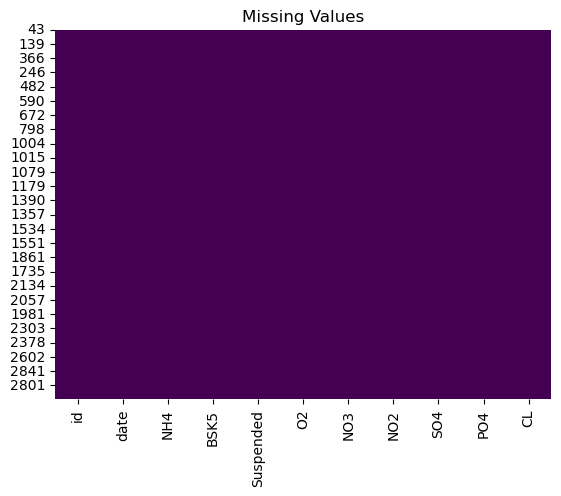

In [45]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing Values")
plt.show()

In [47]:

#Fill misssing values
df['pH']=np.round(np.random.uniform(6.5,8.5,size=len(df)),2)
df.head()

id        date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
43   1  01.12.2010  0.291  3.27       16.7  12.30  59.20  0.090  278.4  0.370   
4    1  02.03.2001  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   
41   1  02.06.2010  0.290  3.52       37.2   7.16  57.87  0.210  268.8  0.240   
22   1  02.09.2005  0.000  3.68       28.5  14.20  15.51  0.033  422.4  0.900   
62   1  02.09.2015  0.035  6.28      104.8   7.80   4.68  0.076  694.4  0.530   

         CL    pH  
43  1375.46  7.98  
4   1462.00  8.09  
41  1120.20  6.69  
22  2063.80  7.51  
62  5615.28  7.26

In [76]:
print(df['pH'].describe())

count    2780.000000
mean        7.500766
std         0.579789
min         6.500000
25%         7.000000
50%         7.500000
75%         8.010000
max         8.500000
Name: pH, dtype: float64


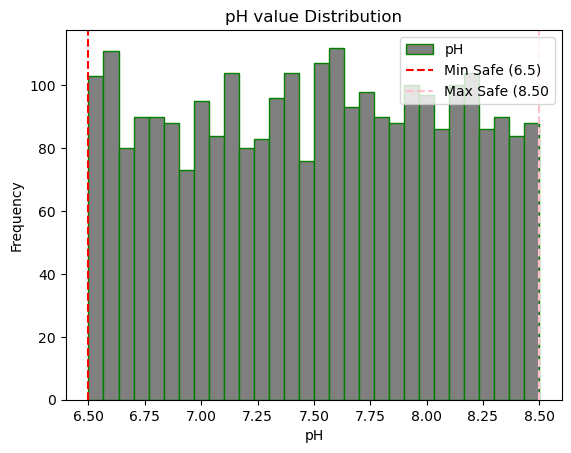

In [49]:
df['pH'].plot(kind='hist',bins=30,color='grey',edgecolor='green',title='pH value Distribution')
plt.axvline(6.5,color='red',linestyle='--',label='Min Safe (6.5)')
plt.axvline(8.5,color='pink',linestyle='--',label='Max Safe (8.50')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.legend()
plt.show()

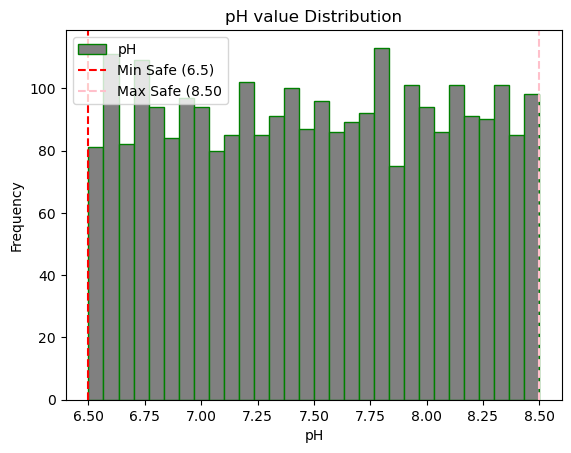

In [80]:
df['pH'].plot(kind='hist',bins=30,color='grey',edgecolor='green',title='pH value Distribution')
plt.axvline(6.5,color='red',linestyle='--',label='Min Safe (6.5)')
plt.axvline(8.5,color='pink',linestyle='--',label='Max Safe (8.50')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.legend()
plt.show()

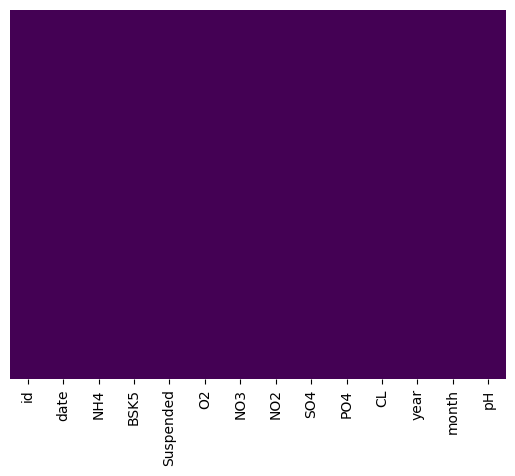

In [82]:
null_df=df.isnull().sum().reset_index()
null_df.columns = ['Column','NULL_count']
null_df['%miss_value']=round(null_df['NULL_count']/len(df),2)*100
null_df
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

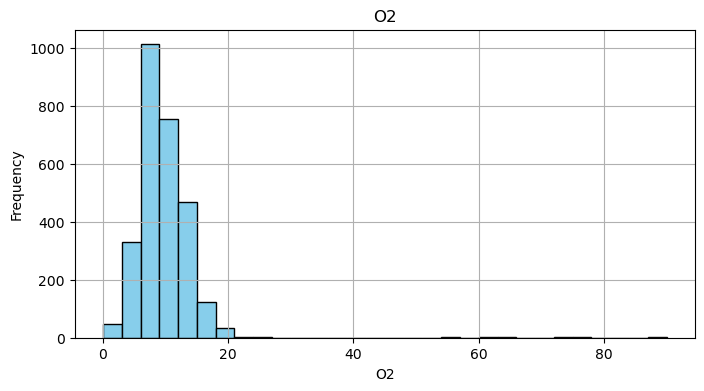

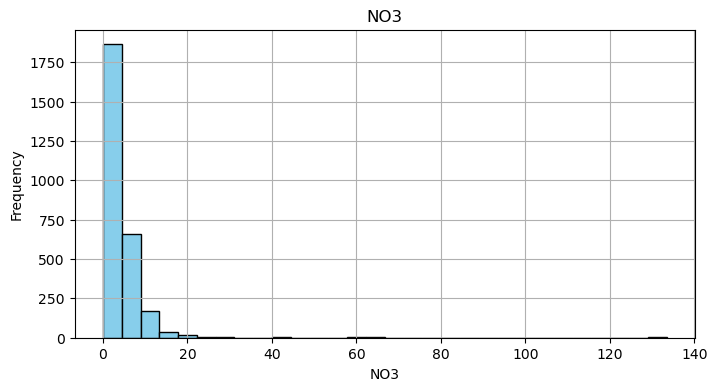

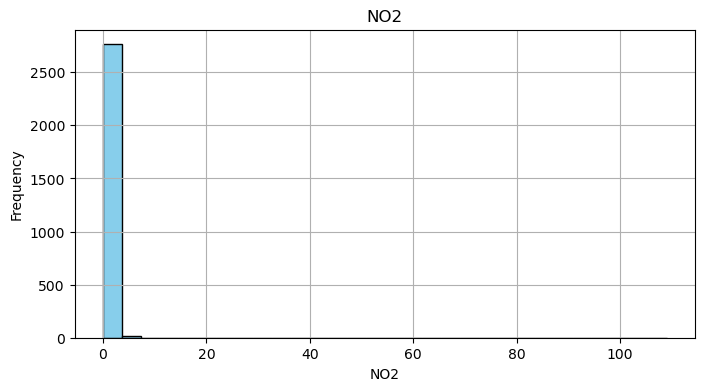

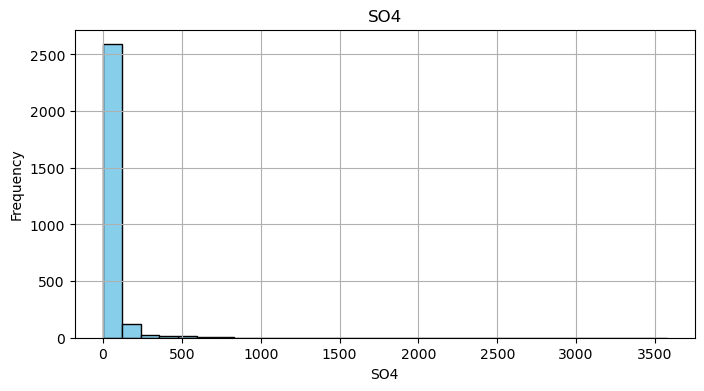

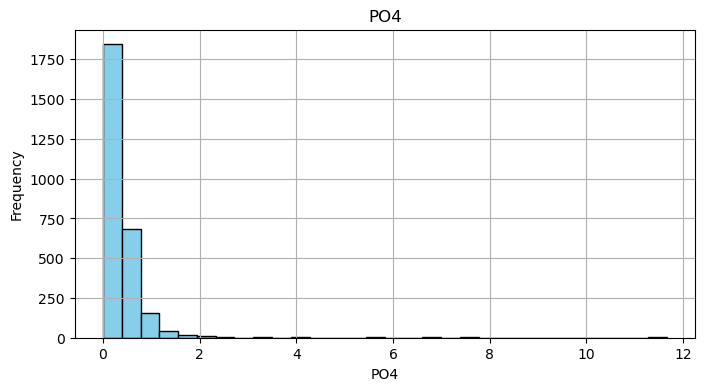

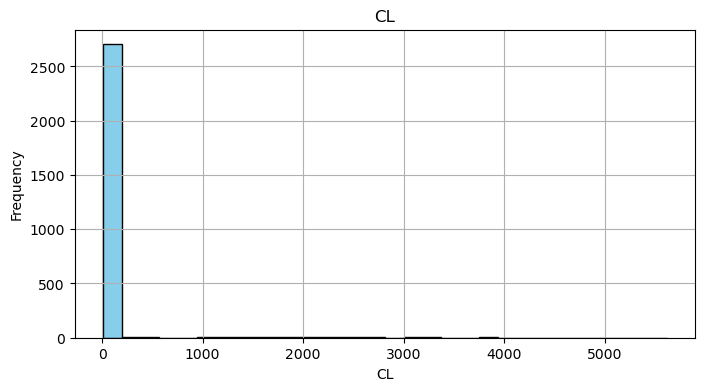

In [84]:
for p in pollutants:
    df[p].plot(kind='hist',bins=30,figsize=(8,4),color='skyblue',edgecolor='black',title=p)
    plt.xlabel(p)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

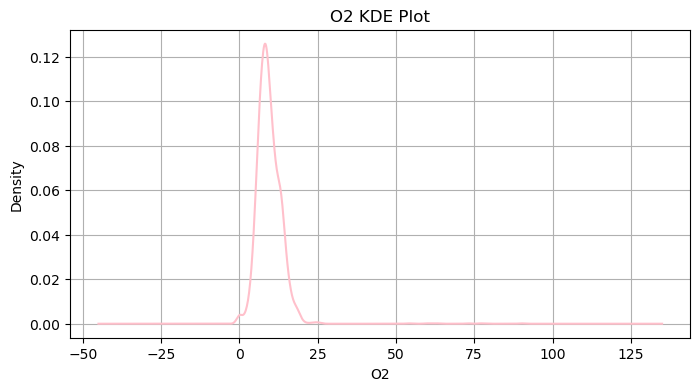

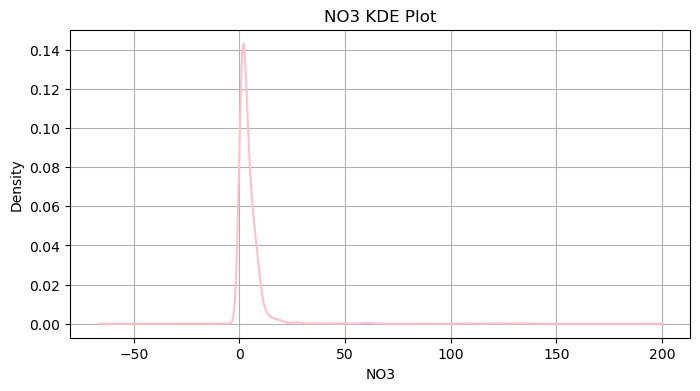

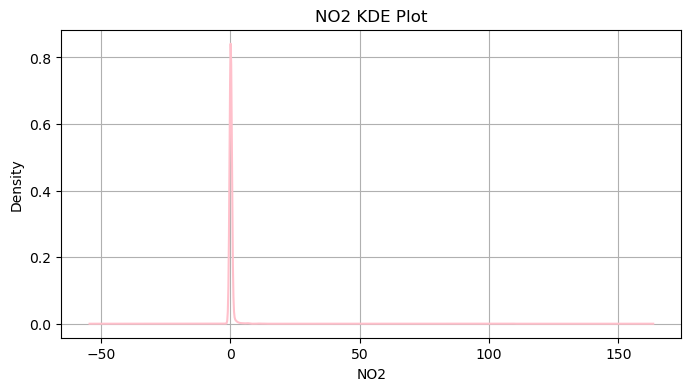

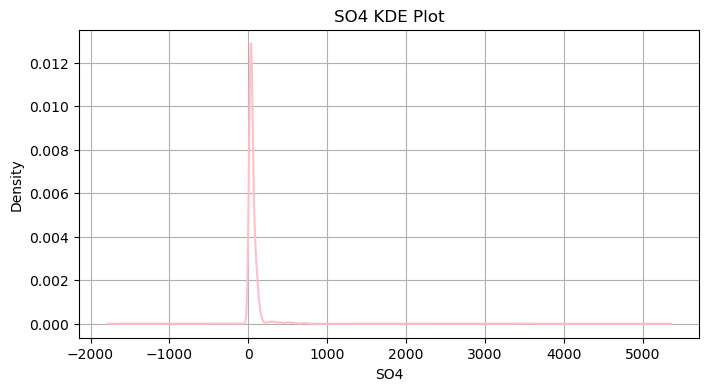

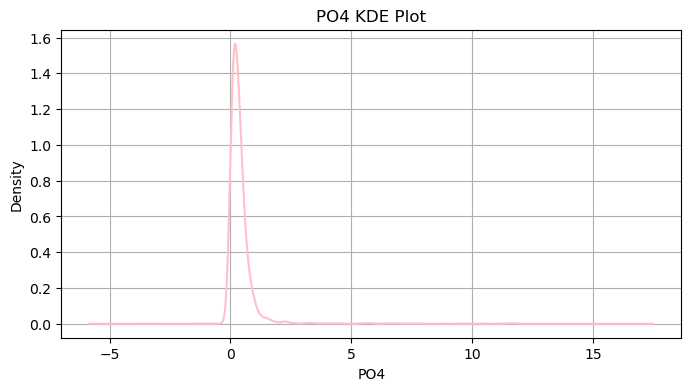

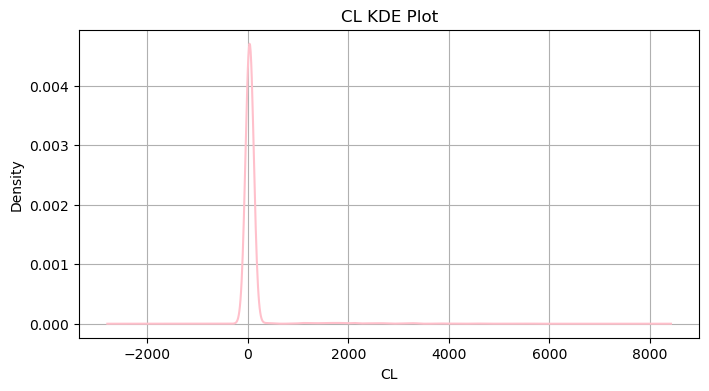

In [51]:

#KDE plot
for j in pollutants:
    df[j].plot(kind='kde',figsize=(8,4),color='pink',title=f'{j} KDE Plot')
    plt.xlabel(j)
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

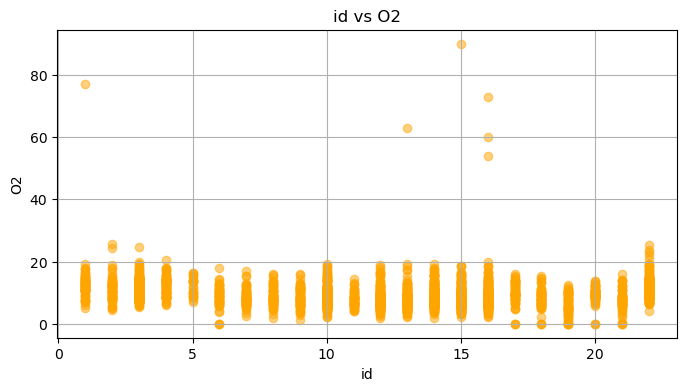

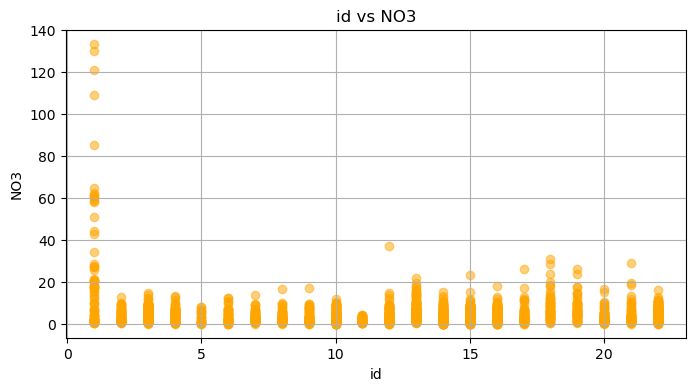

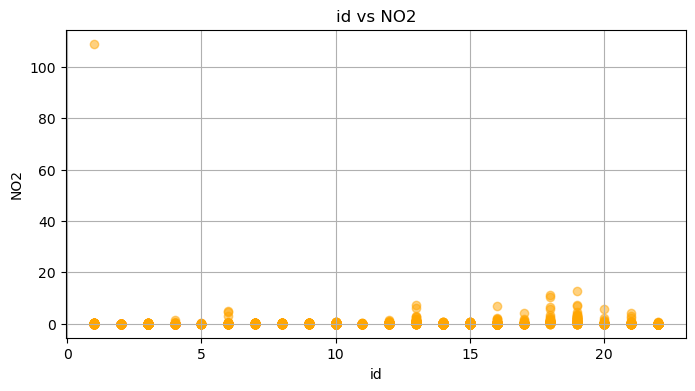

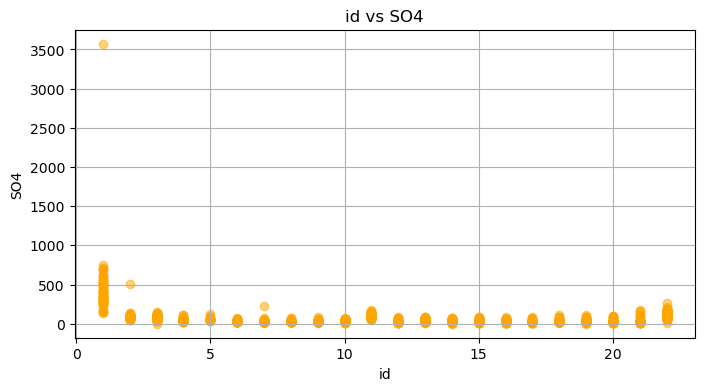

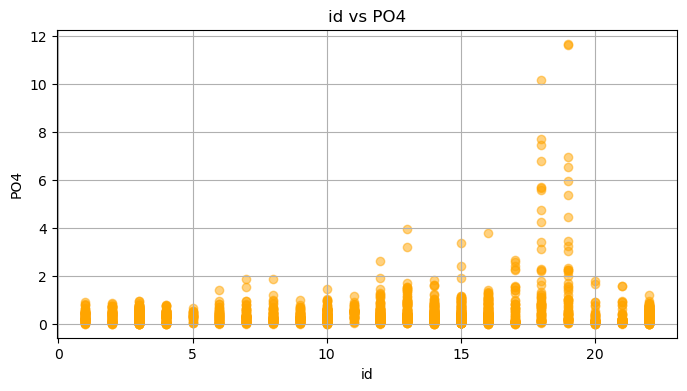

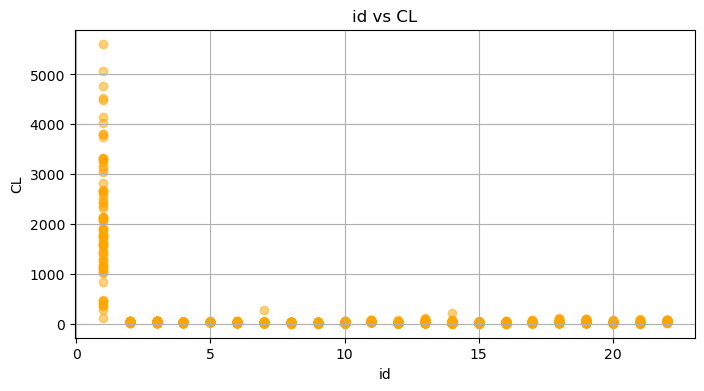

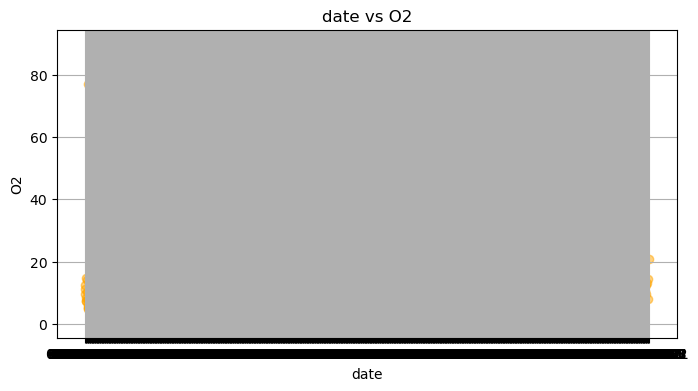

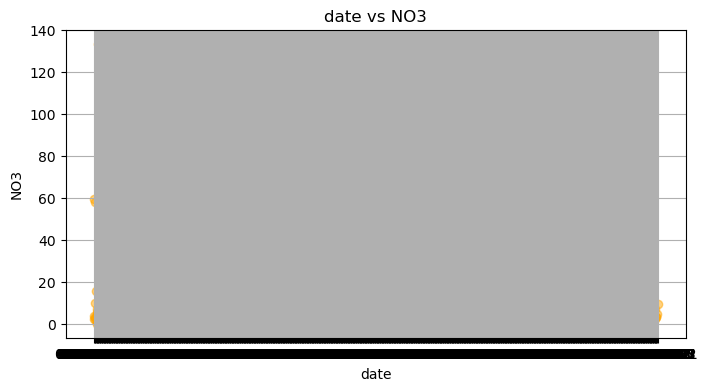

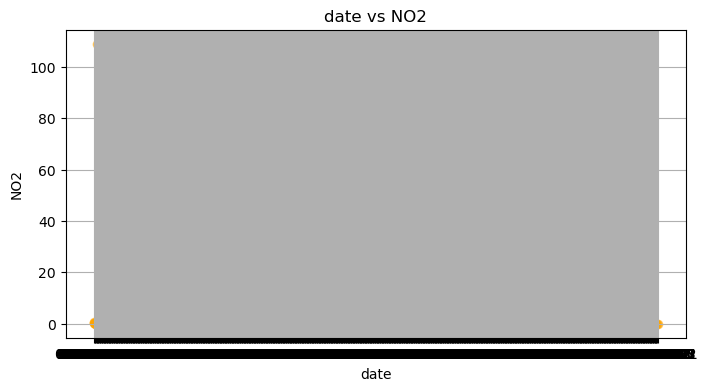

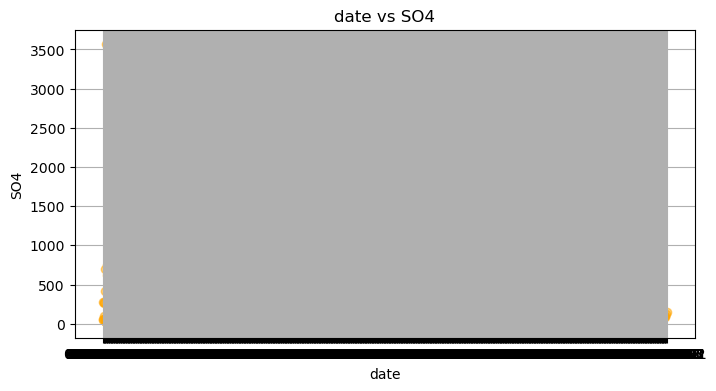

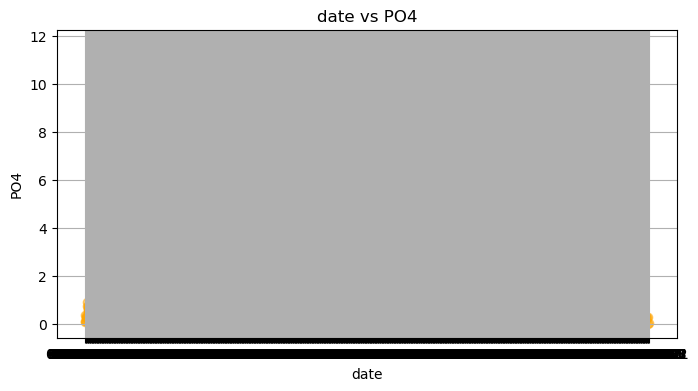

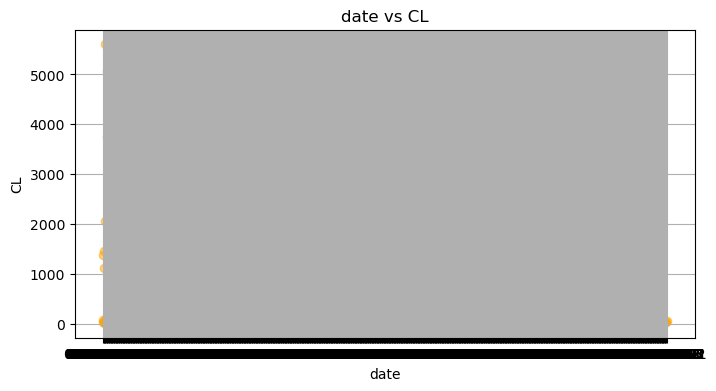

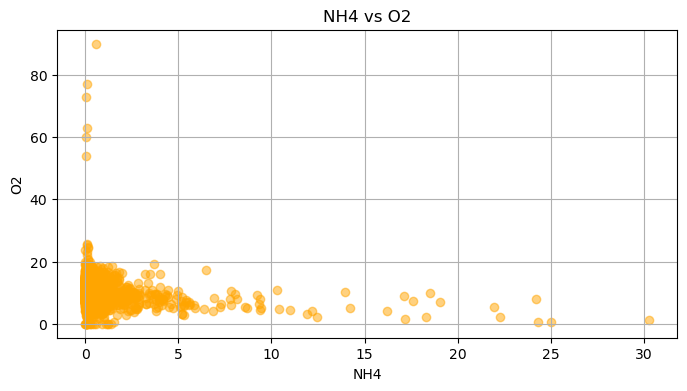

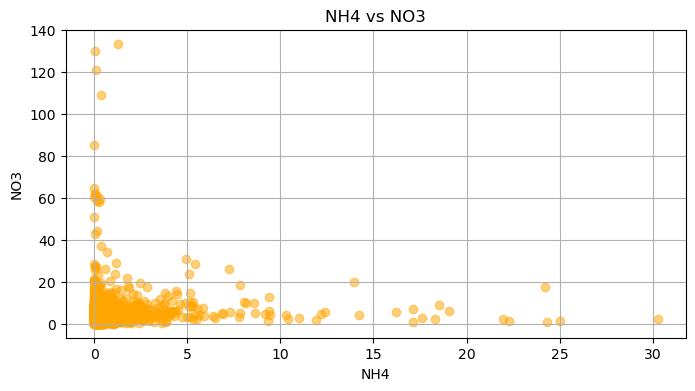

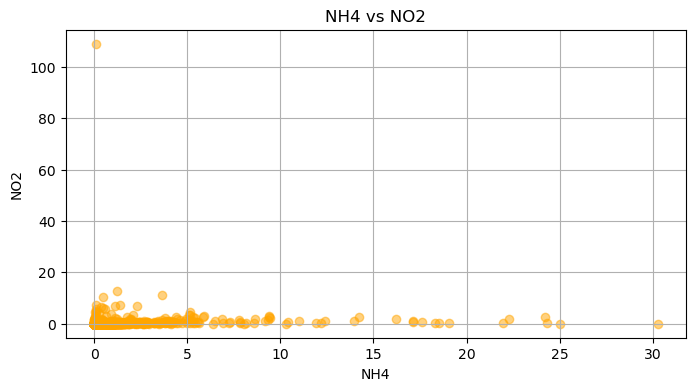

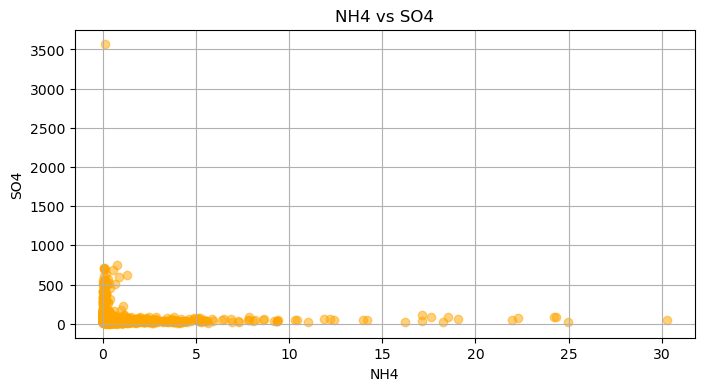

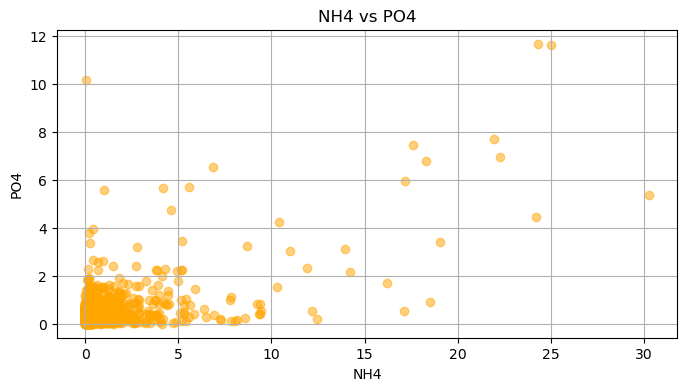

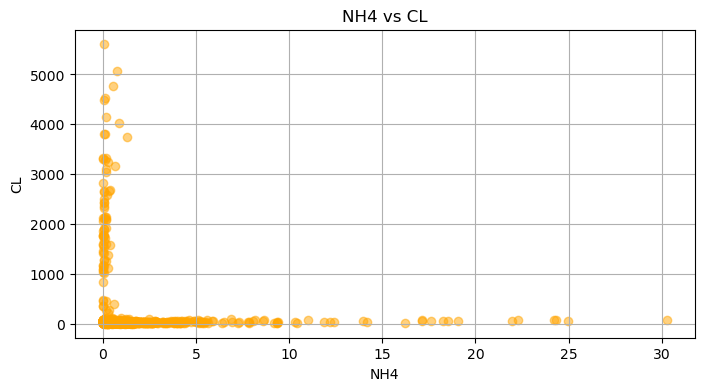

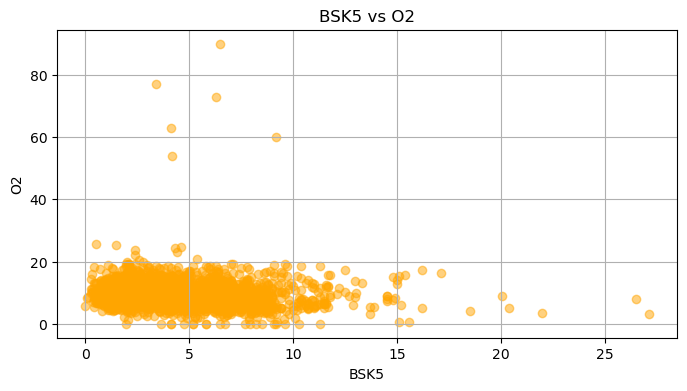

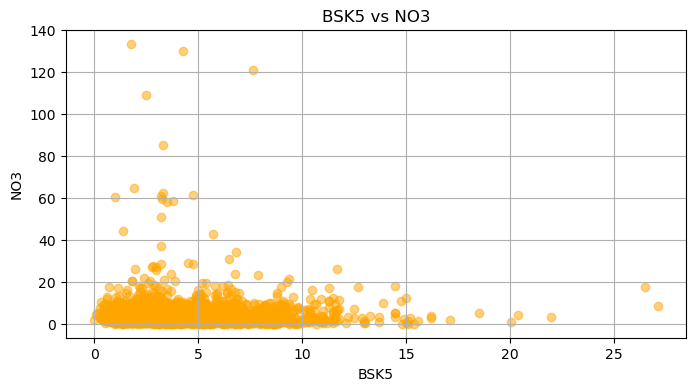

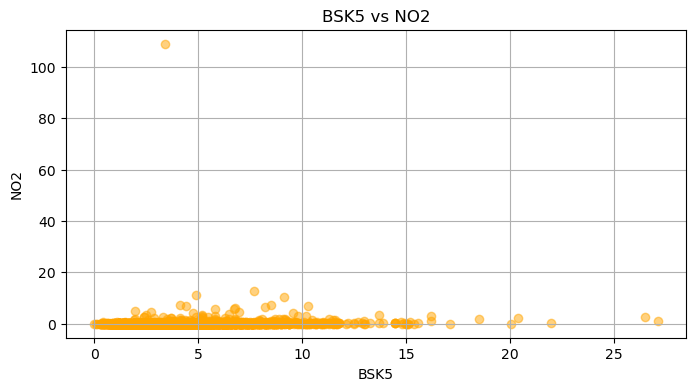

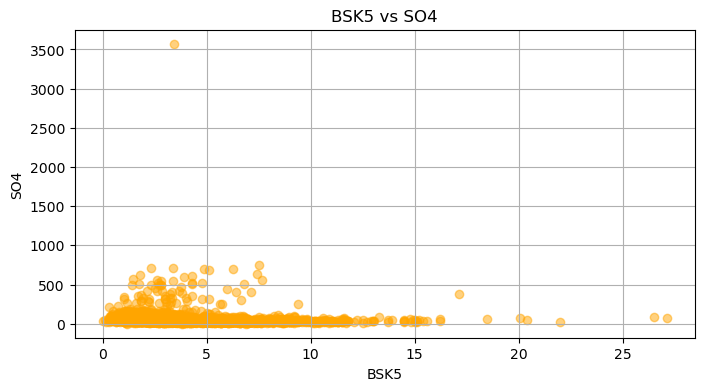

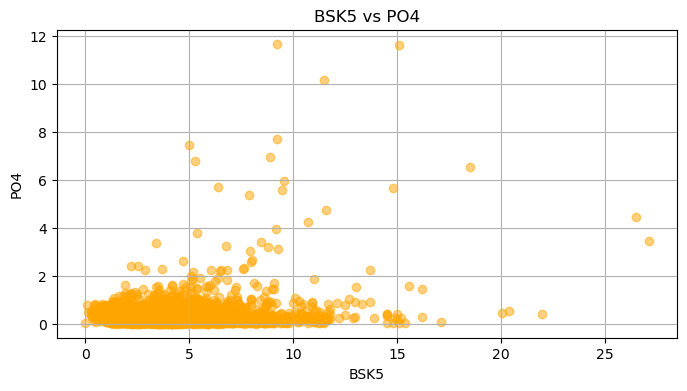

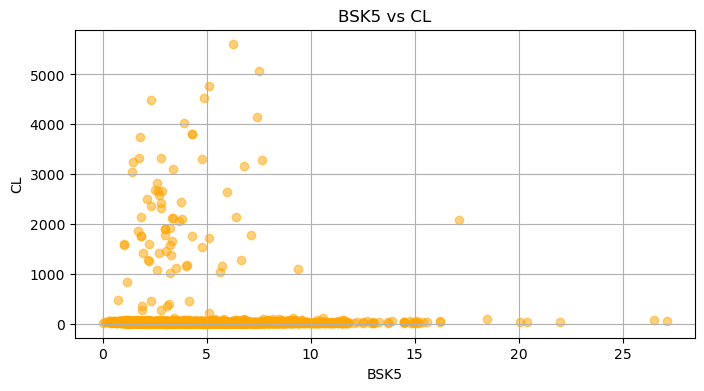

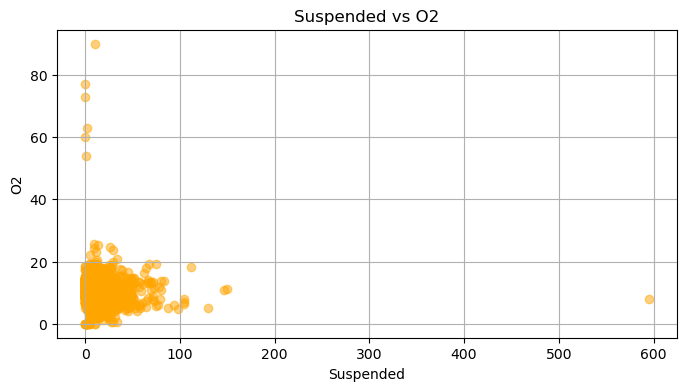

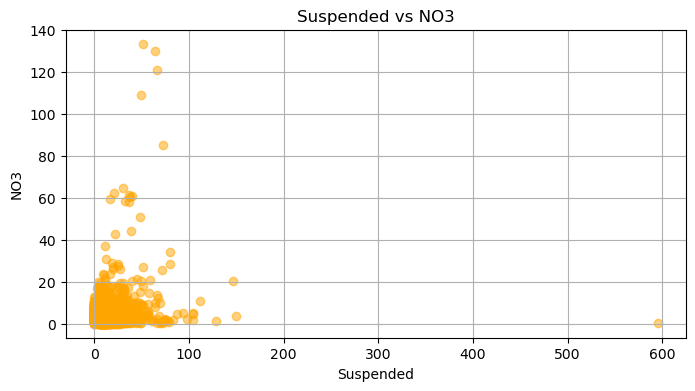

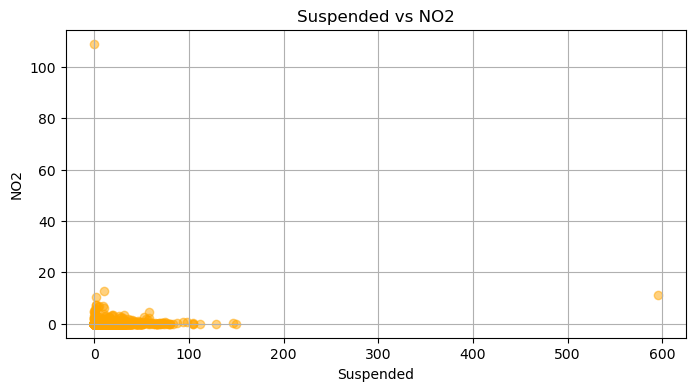

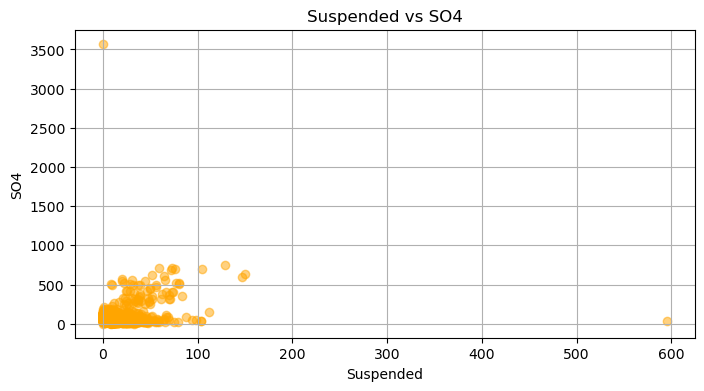

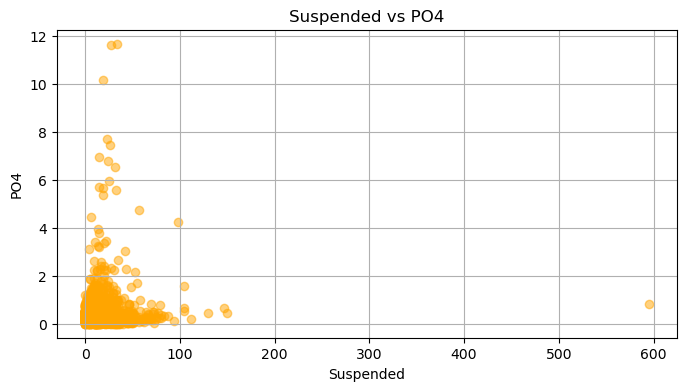

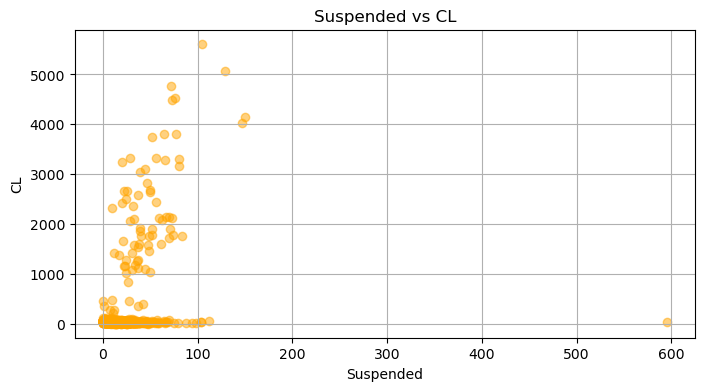

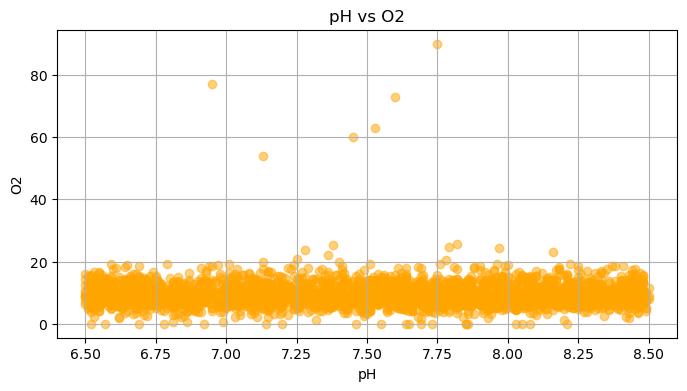

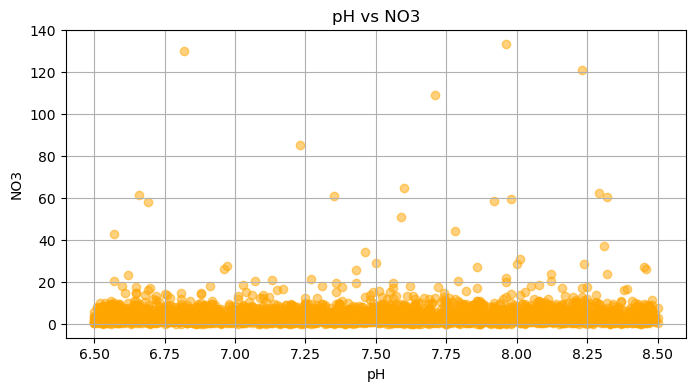

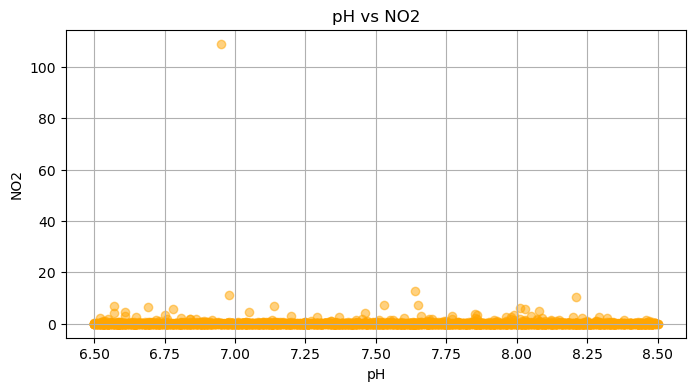

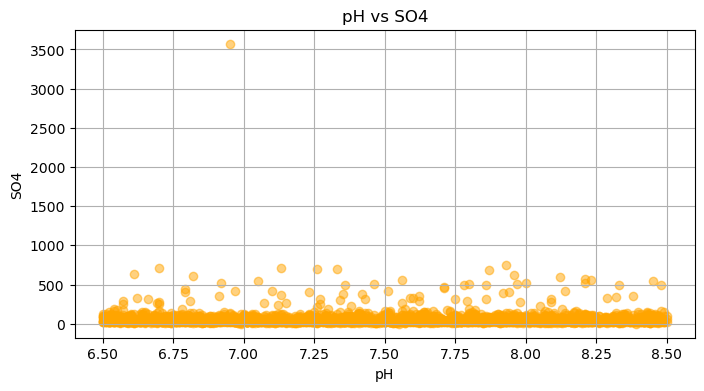

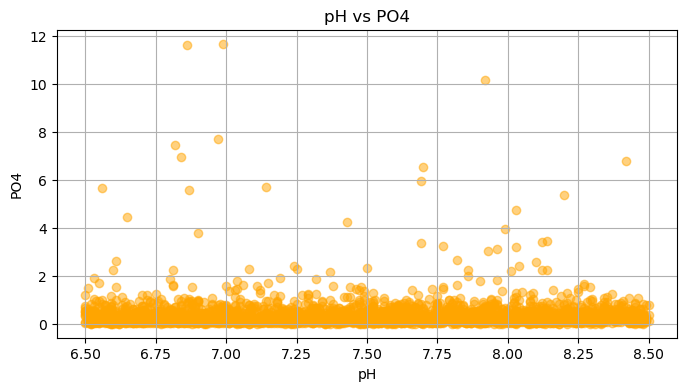

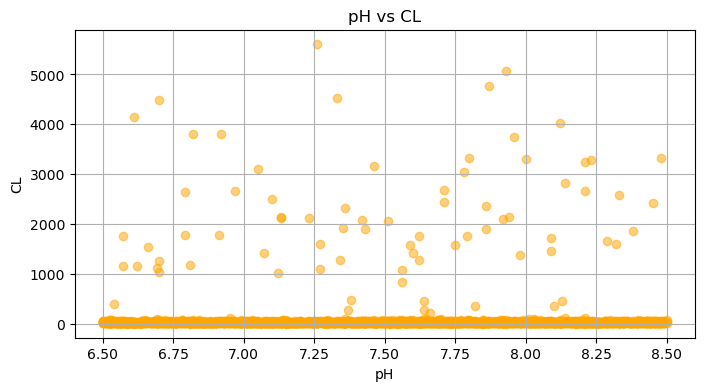

In [71]:
Index = df.columns  # Get all column names from the DataFrame

extra_pollutants = [i for i in Index if i not in pollutants]

for j in extra_pollutants:
    for i in pollutants:
        plt.figure(figsize=(8, 4))
        plt.scatter(df[j], df[i], color='orange', alpha=0.5)
        plt.title(f"{j} vs {i}")
        plt.xlabel(j)
        plt.ylabel(i)
        plt.grid(True)
        plt.show()


In [79]:

model=MultiOutputRegressor(RandomForestRegressor(n_estimators=100,random_state=42))
model.fit(X_train,y_train) 

NameError: name 'X_train' is not defined

In [81]:
y_pred=model.predict(X_test)

NameError: name 'X_test' is not defined

In [83]:
print("Model Performance on the Test Data: ")
for i,pollutant in enumerate(pollutants):
    print(f'{pollutant} :')
    print("MSE :",mean_squared_error(y_test.iloc[:,i],y_pred[:,i]))
    print("R2 :",r2_score(y_test.iloc[:,i],y_pred[:,i]))
    print()

Model Performance on the Test Data: 
PM2.5 :


NameError: name 'y_test' is not defined

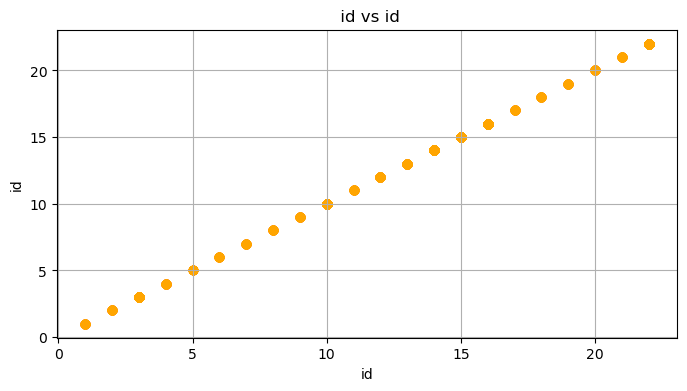

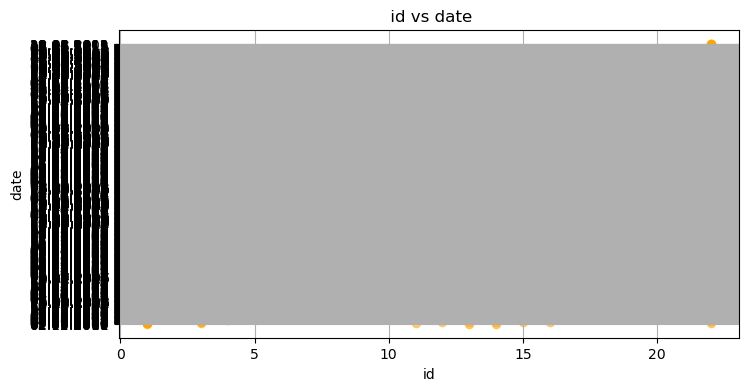

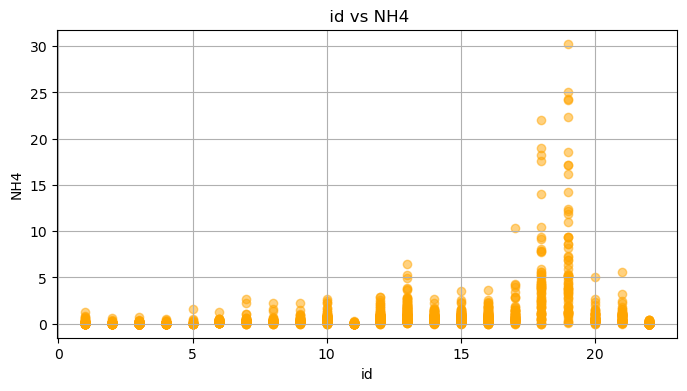

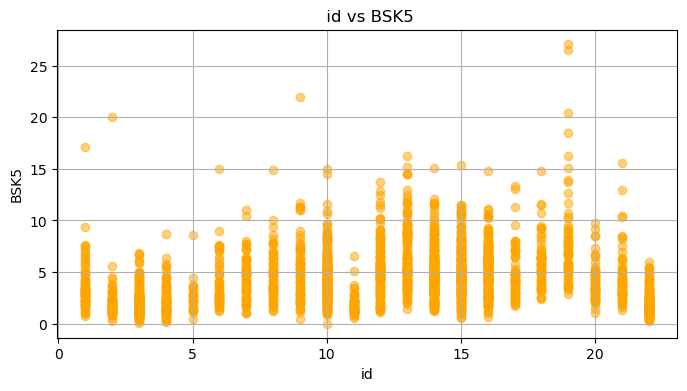

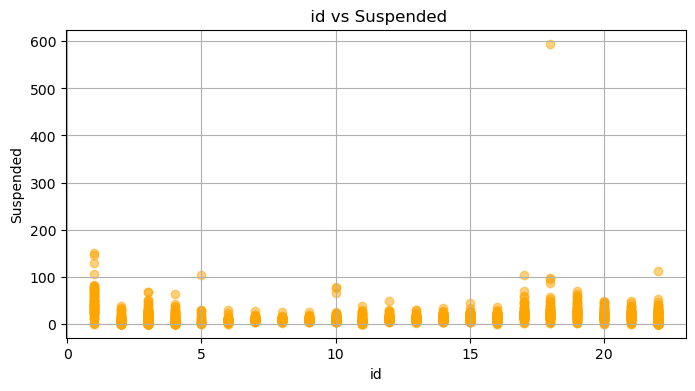

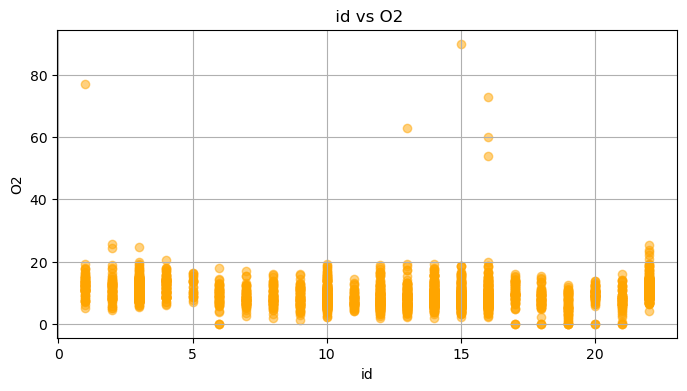

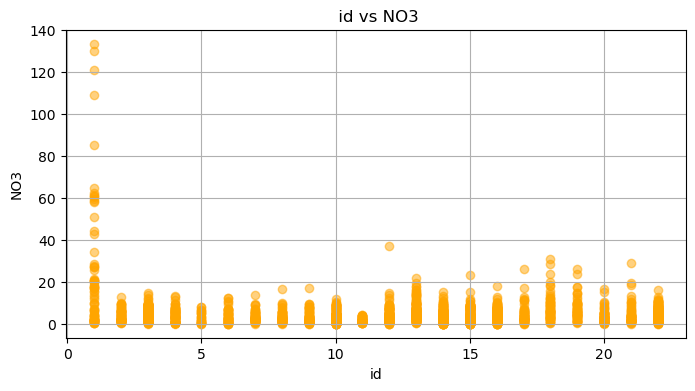

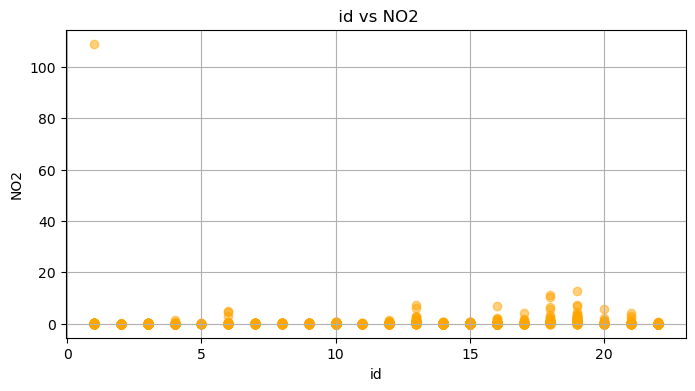

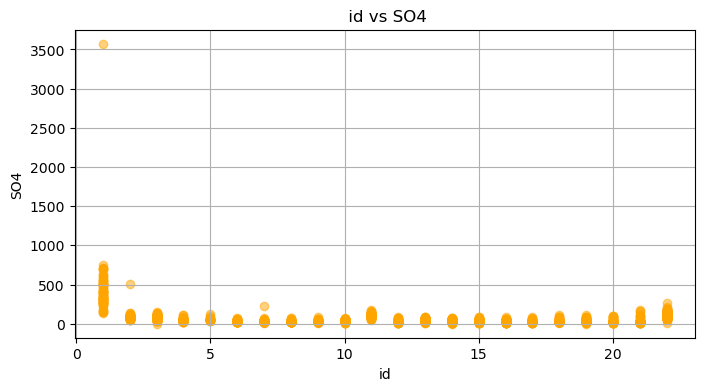

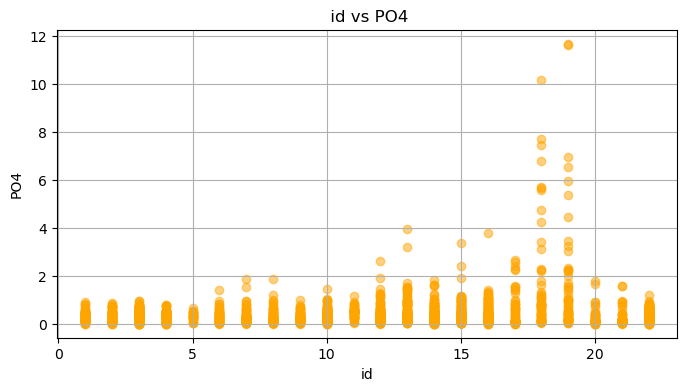

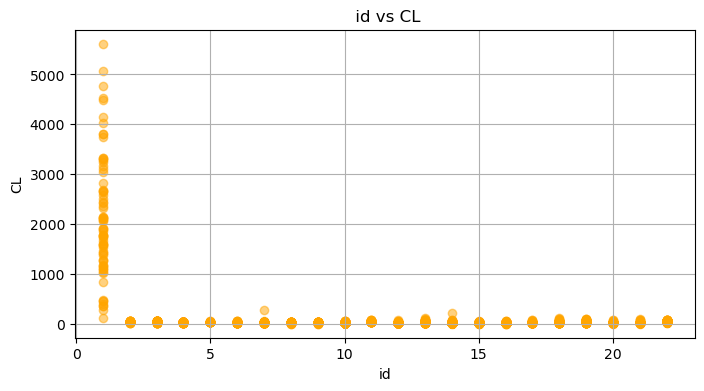

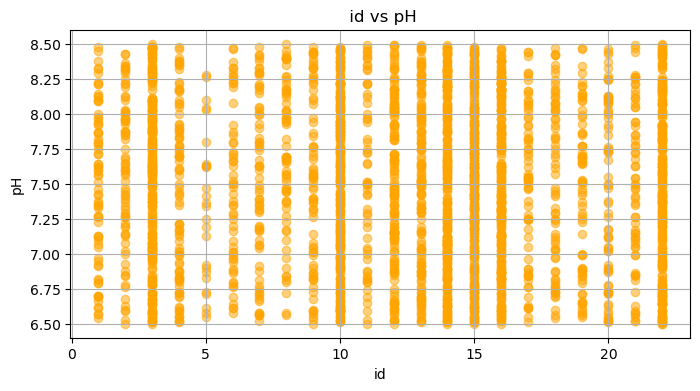

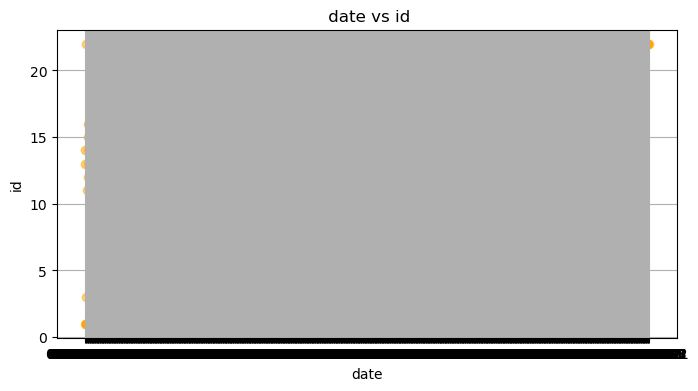

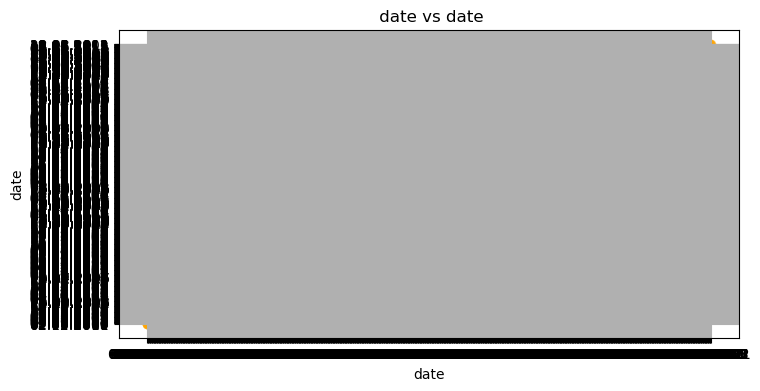

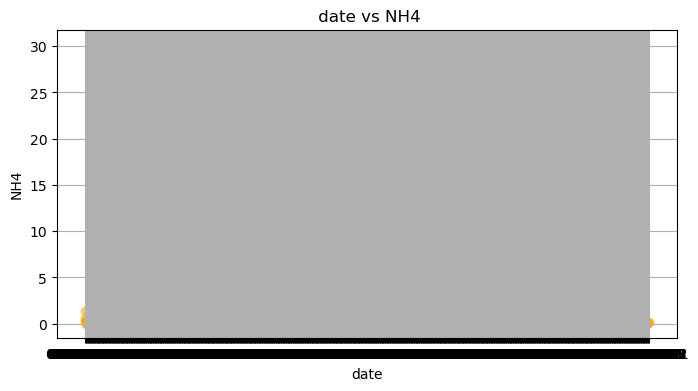

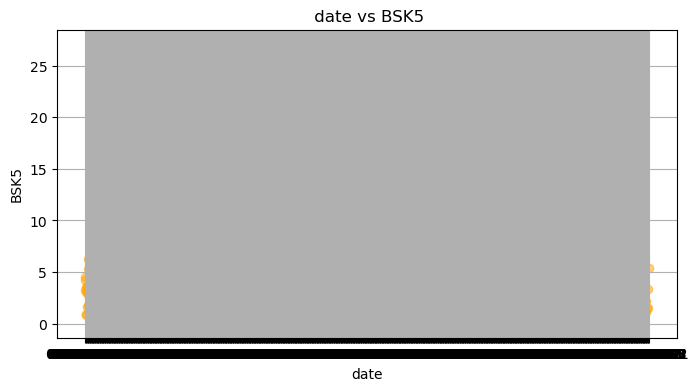

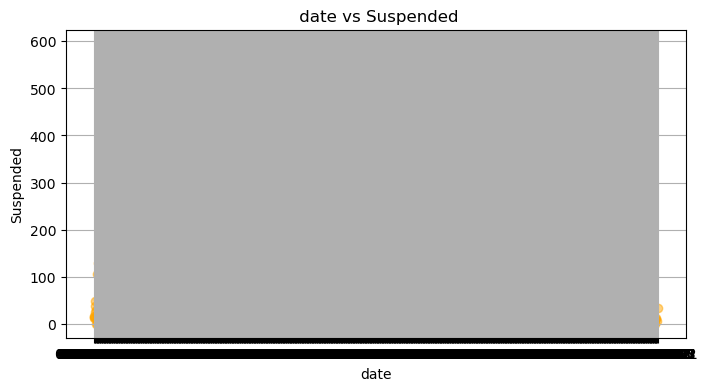

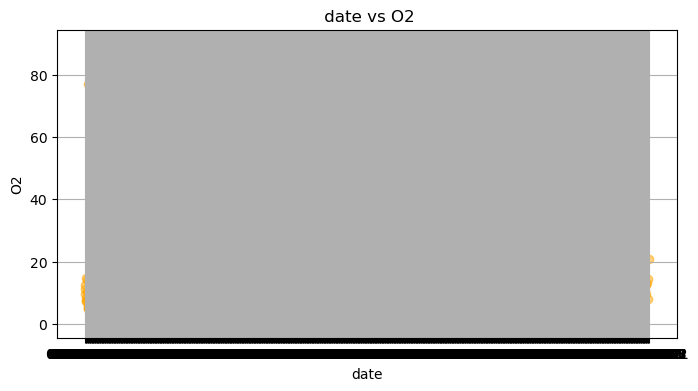

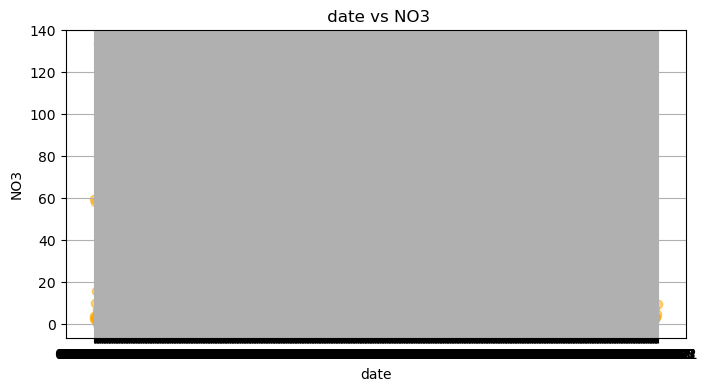

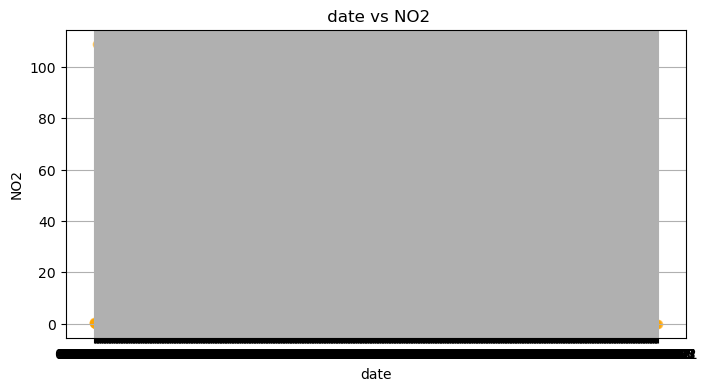

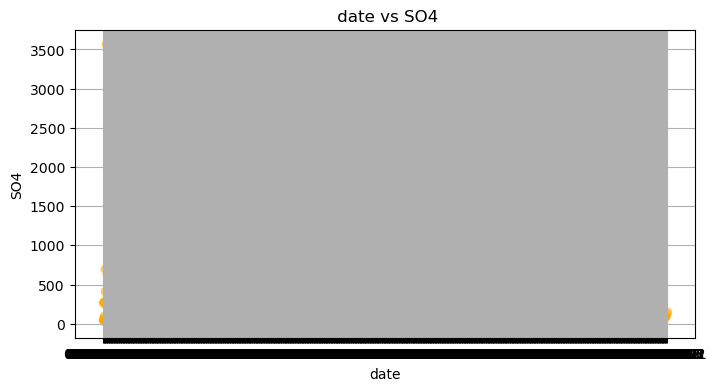

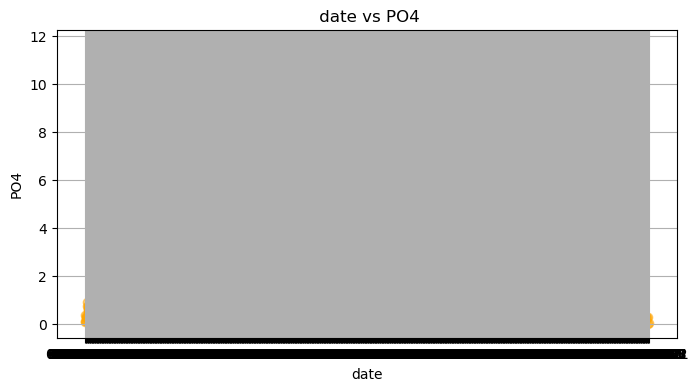

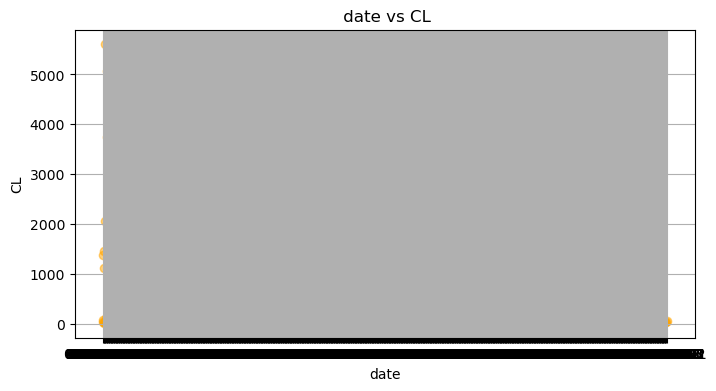

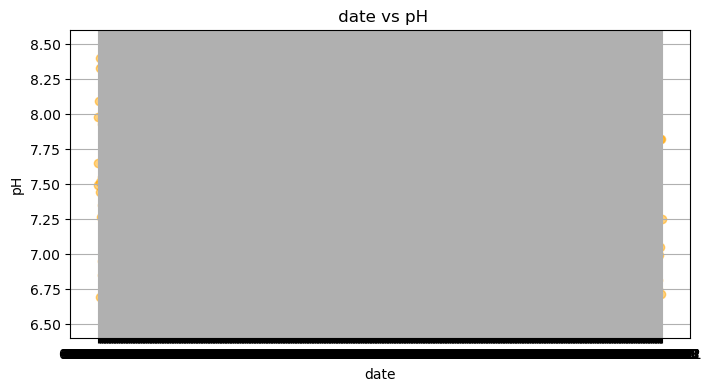

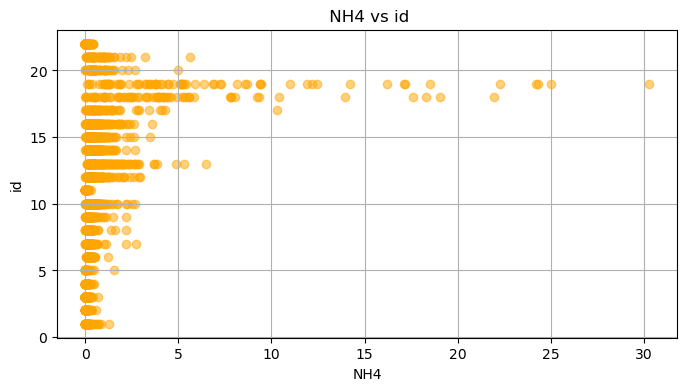

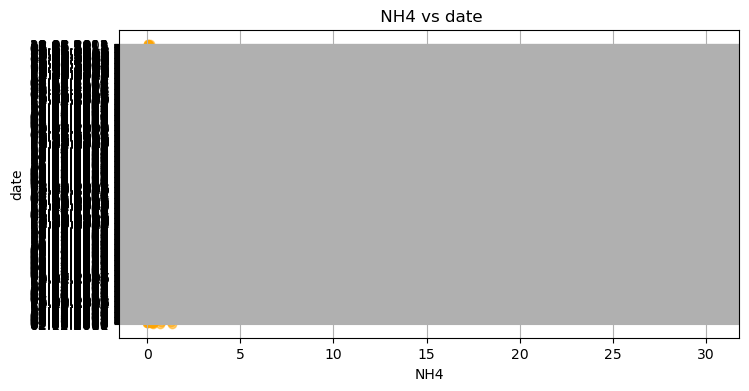

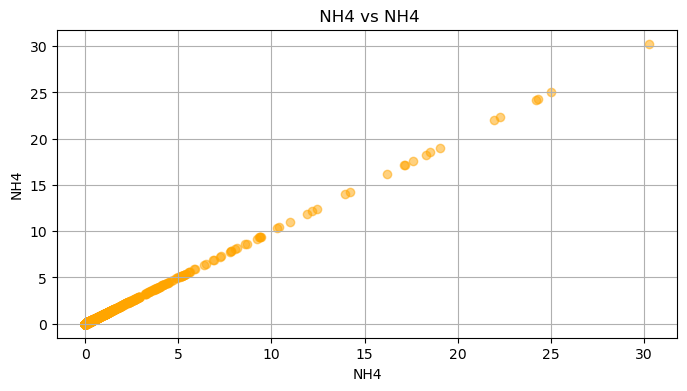

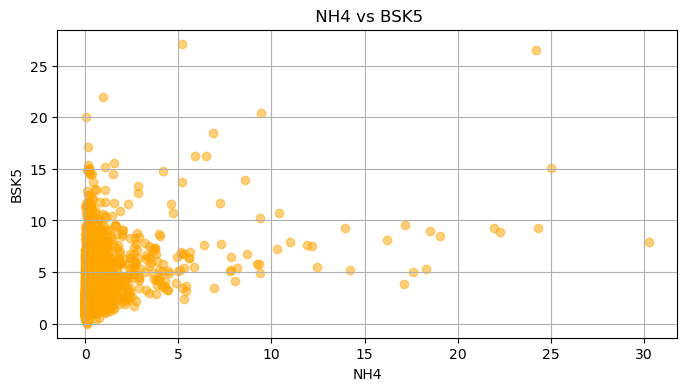

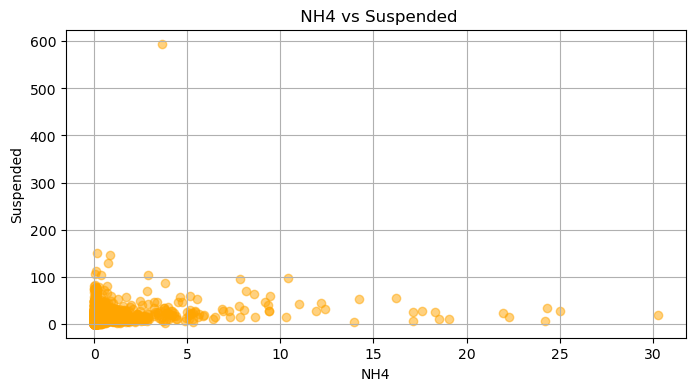

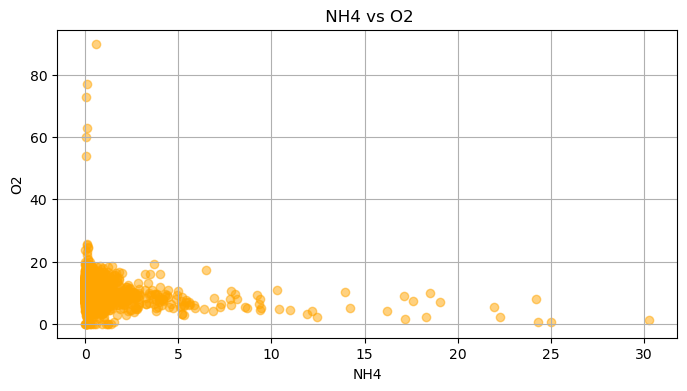

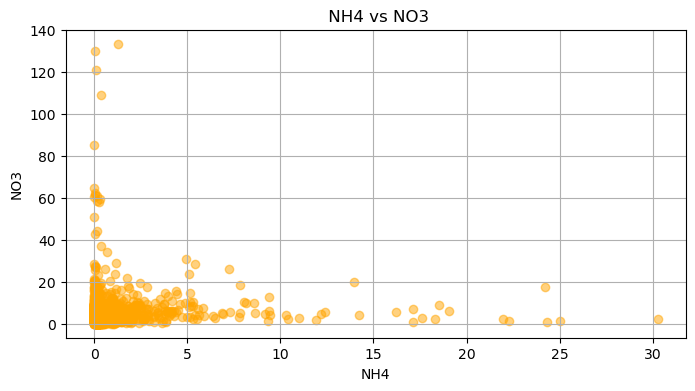

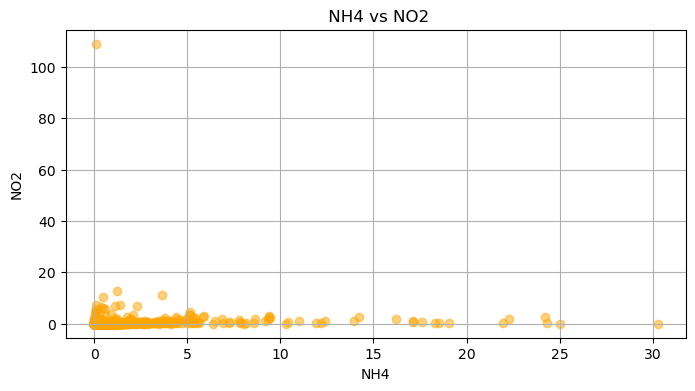

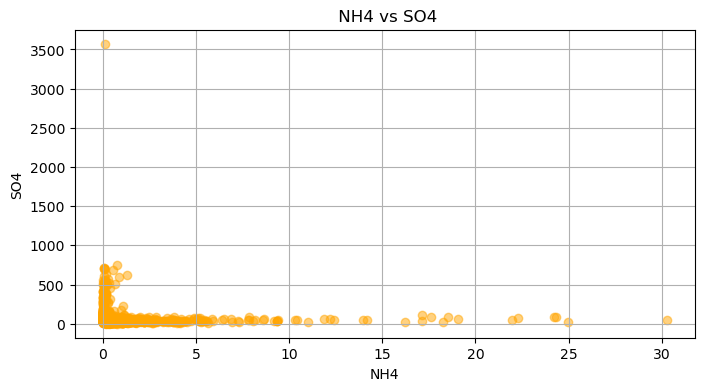

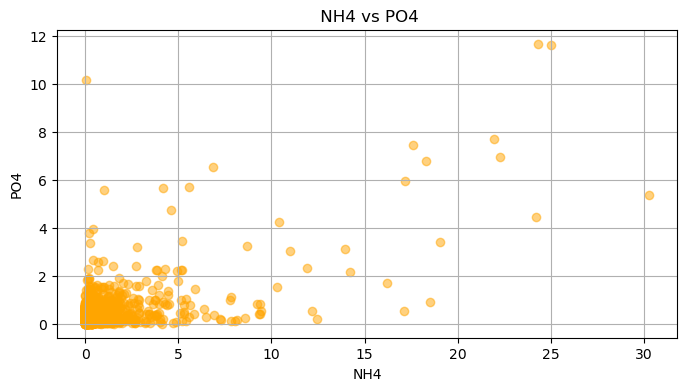

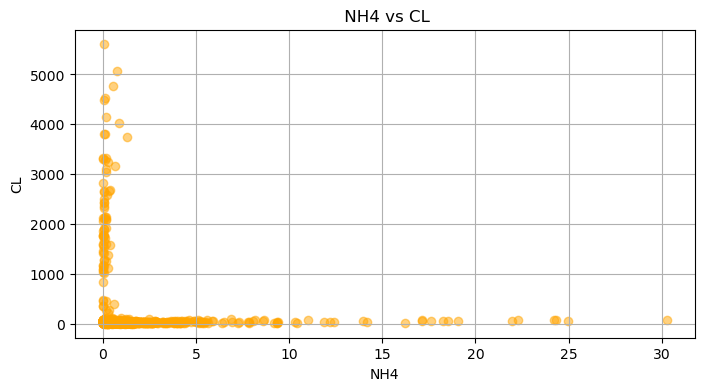

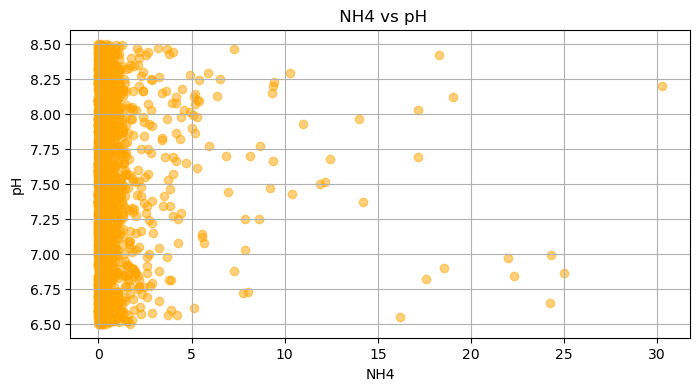

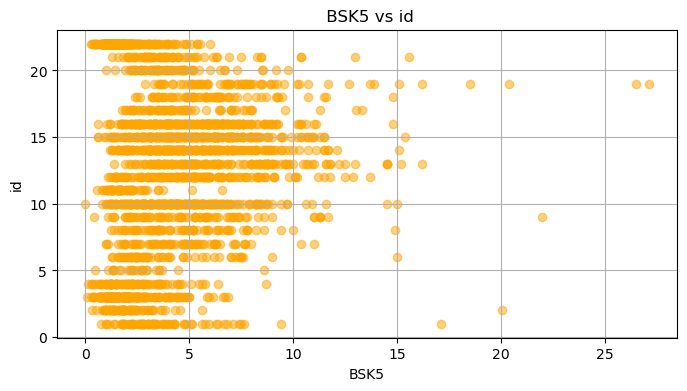

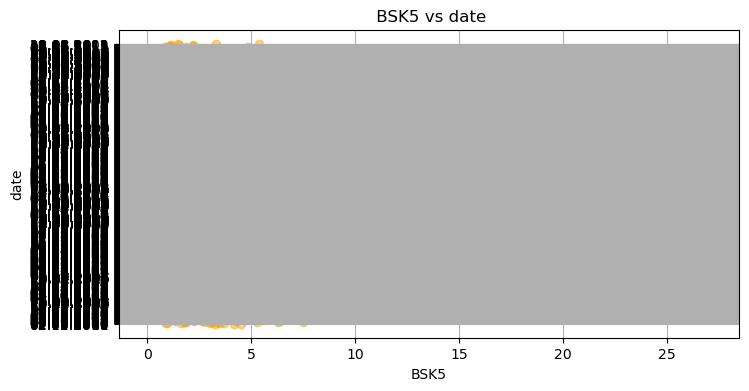

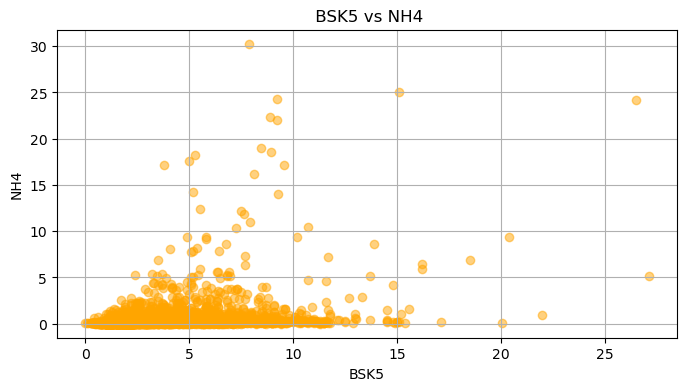

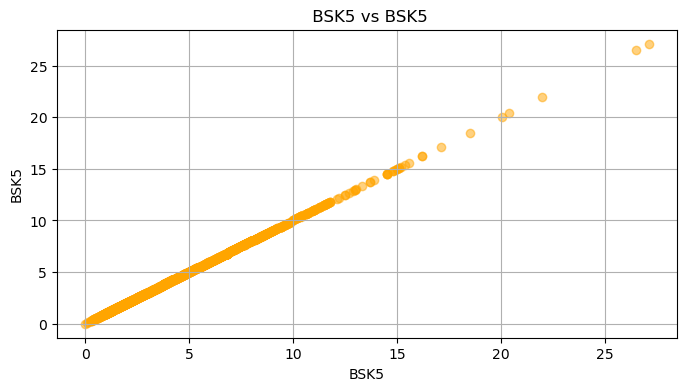

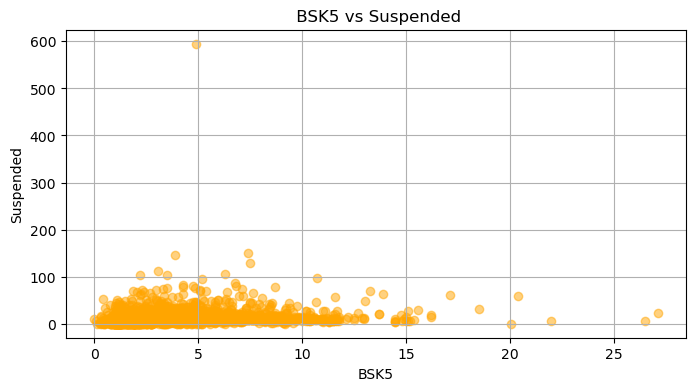

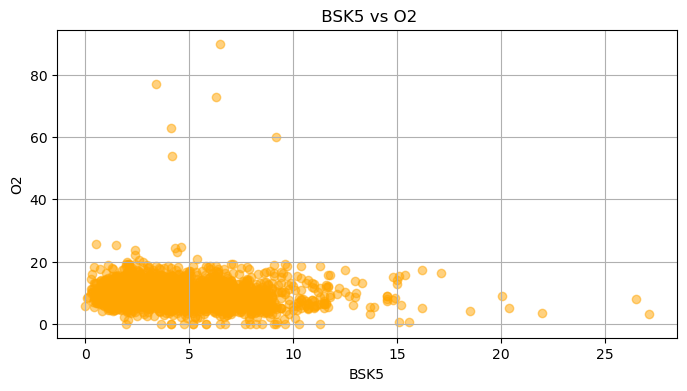

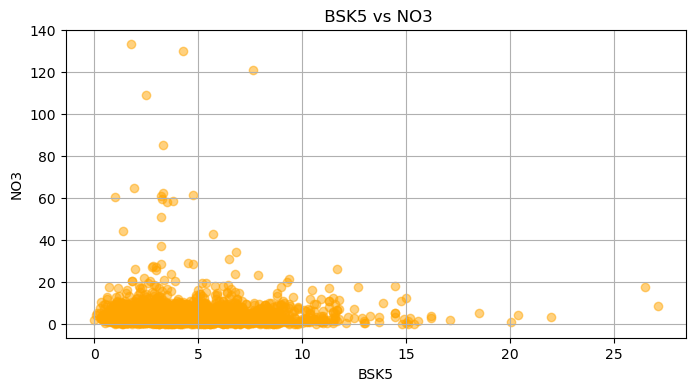

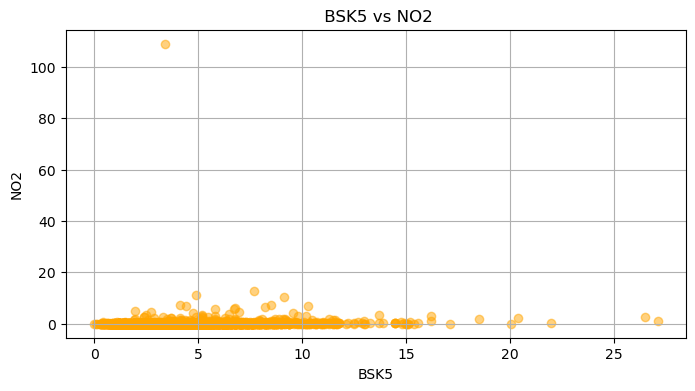

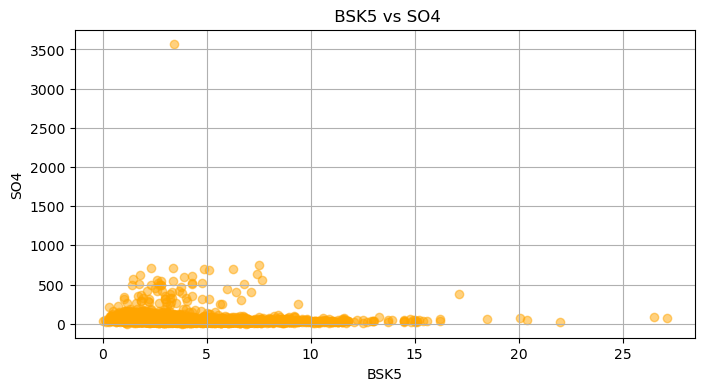

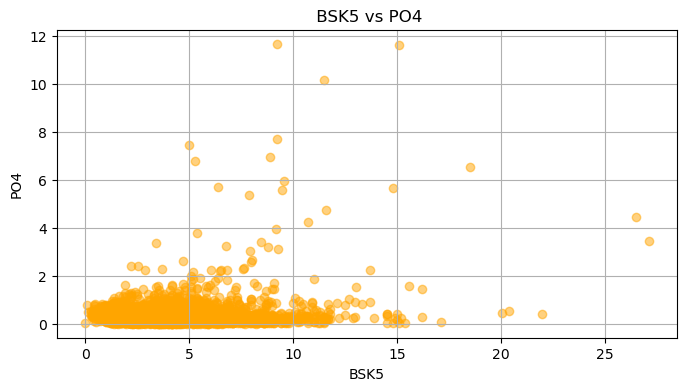

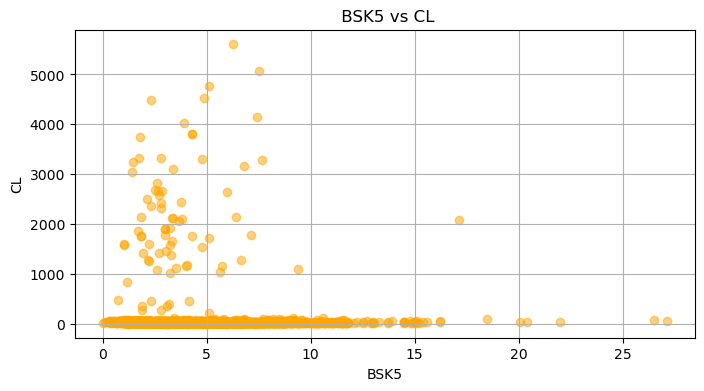

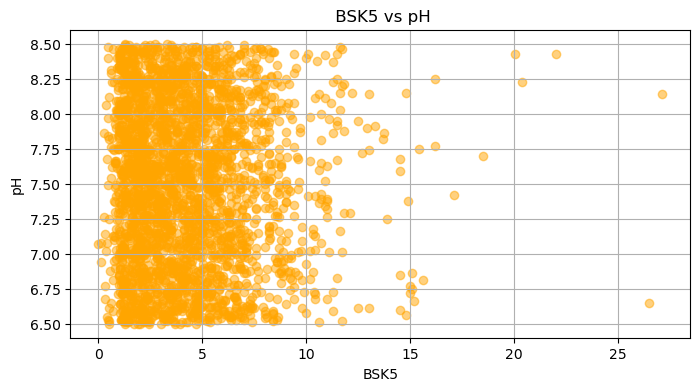

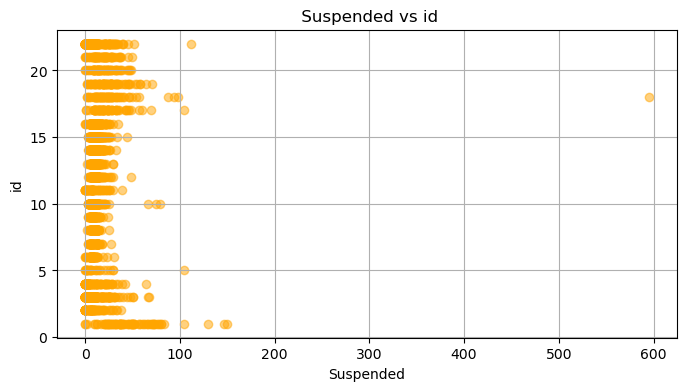

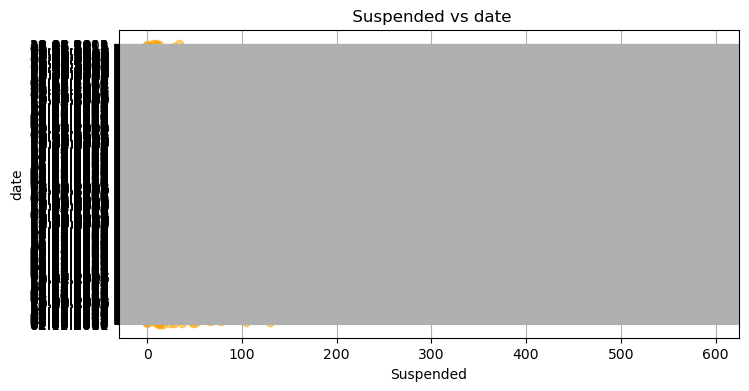

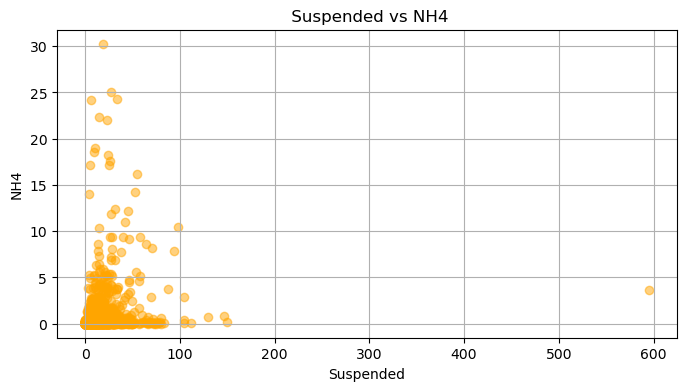

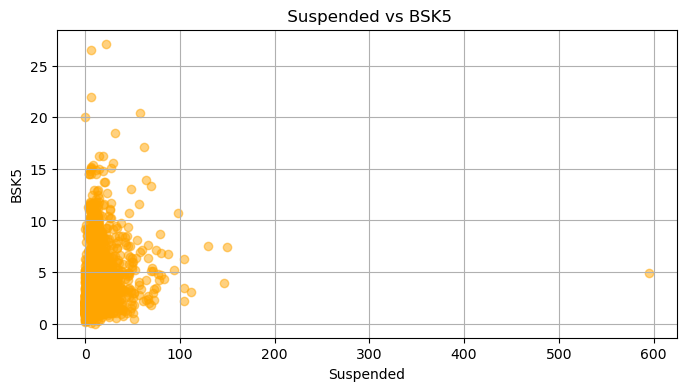

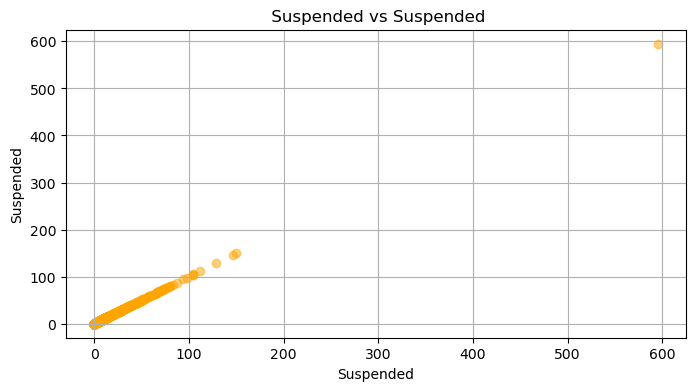

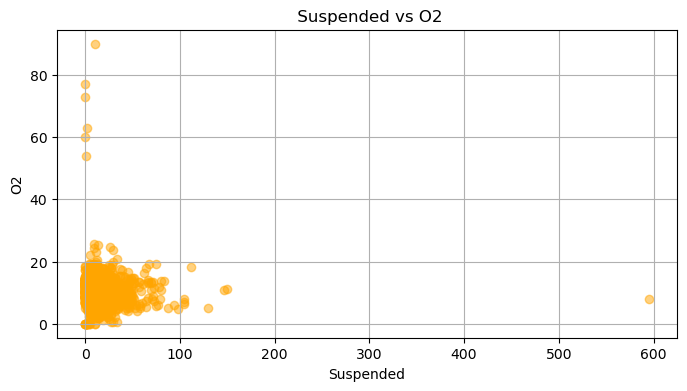

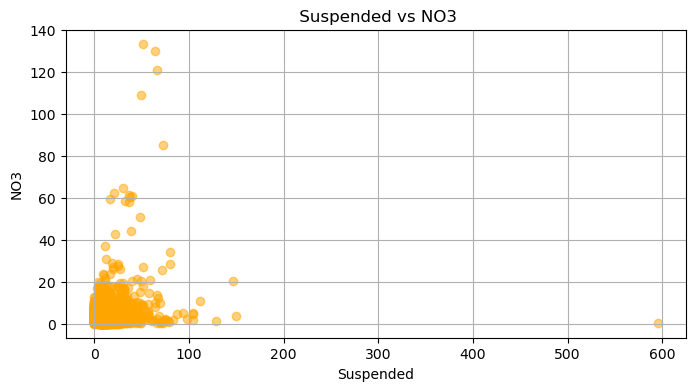

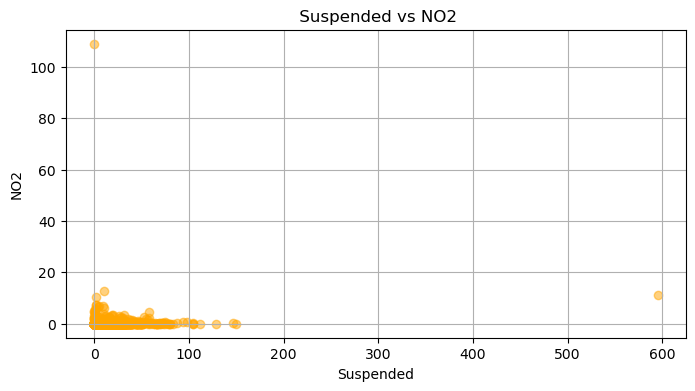

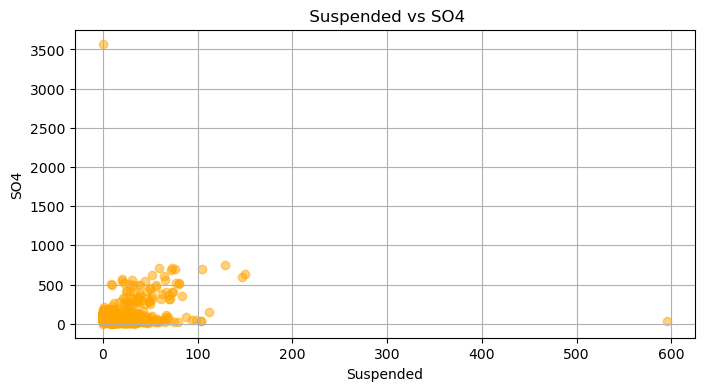

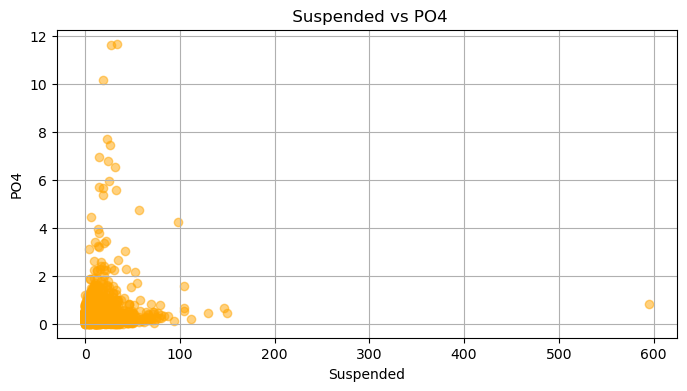

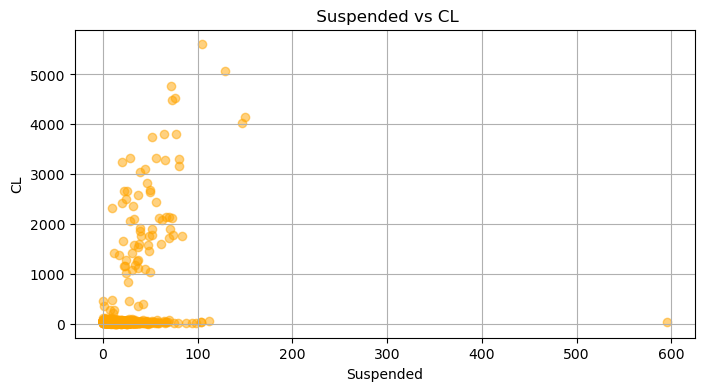

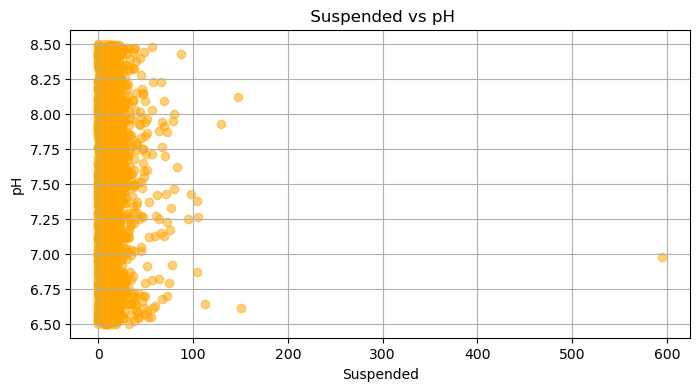

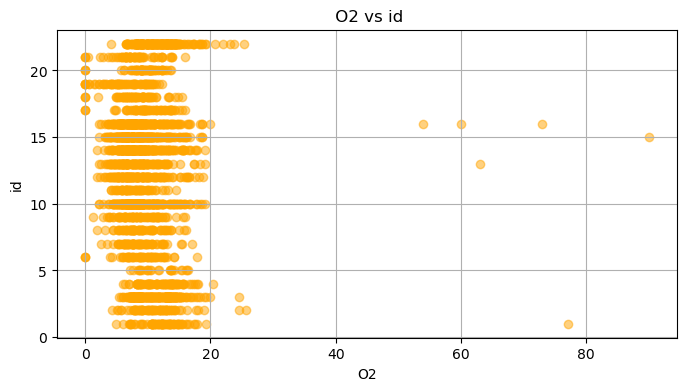

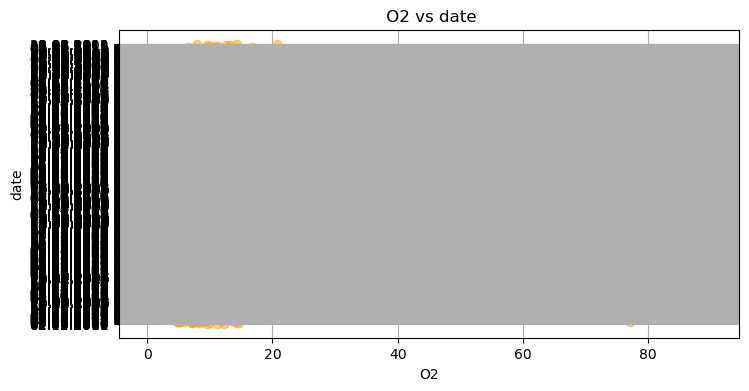

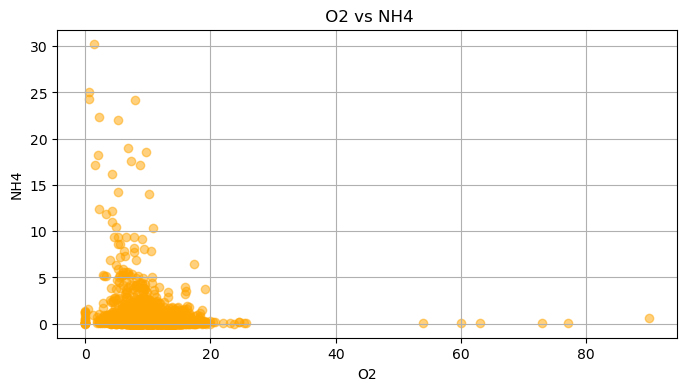

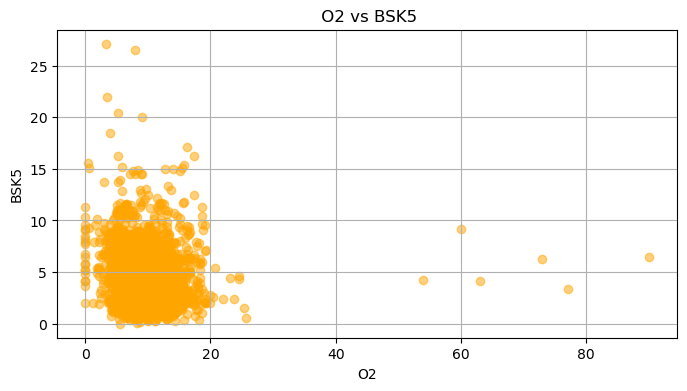

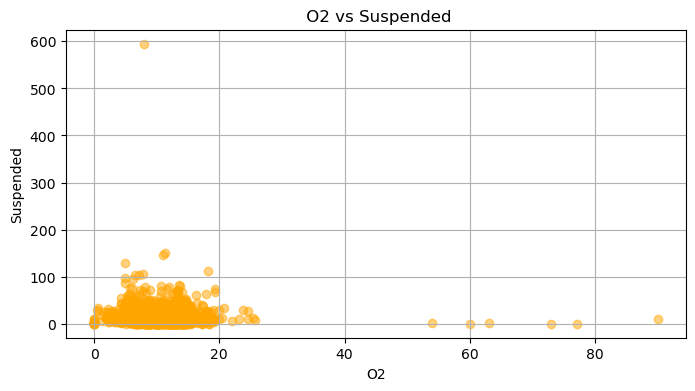

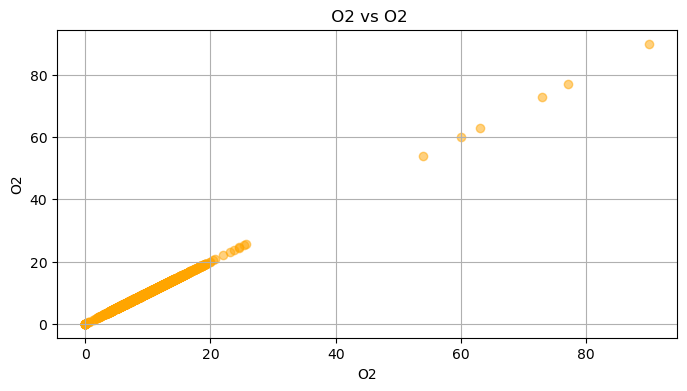

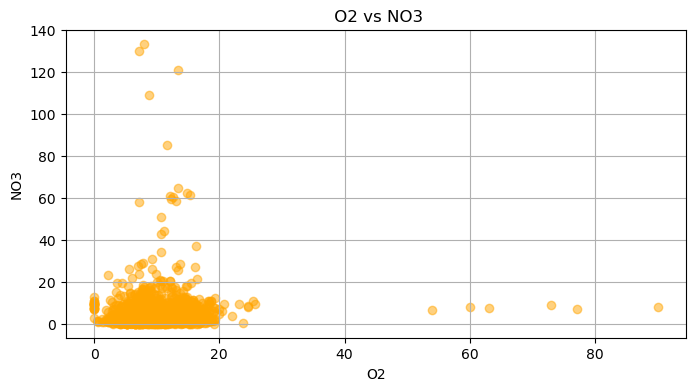

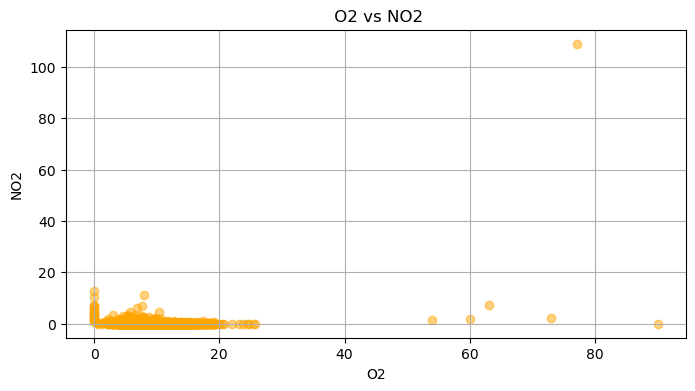

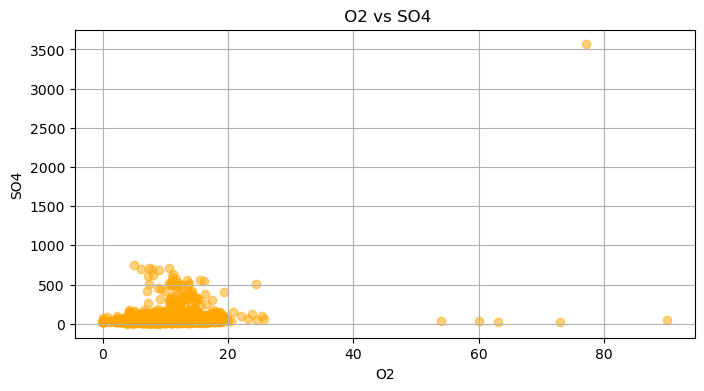

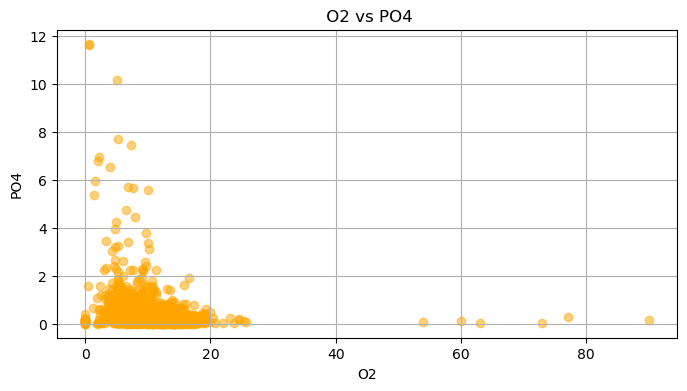

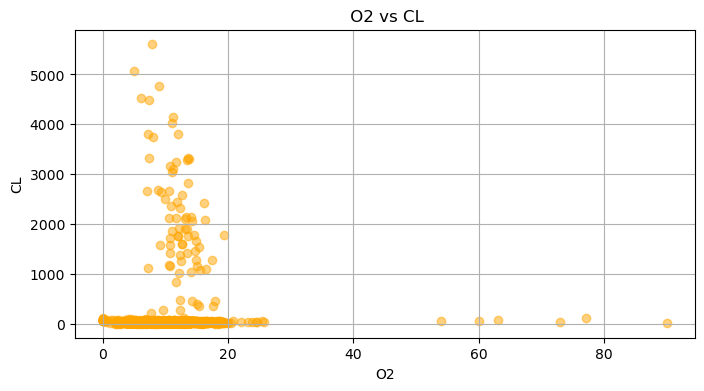

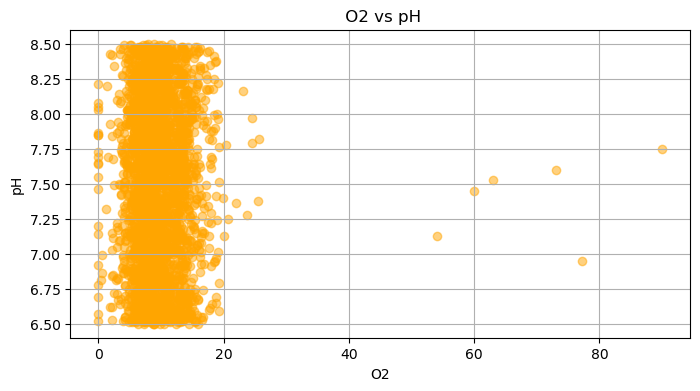

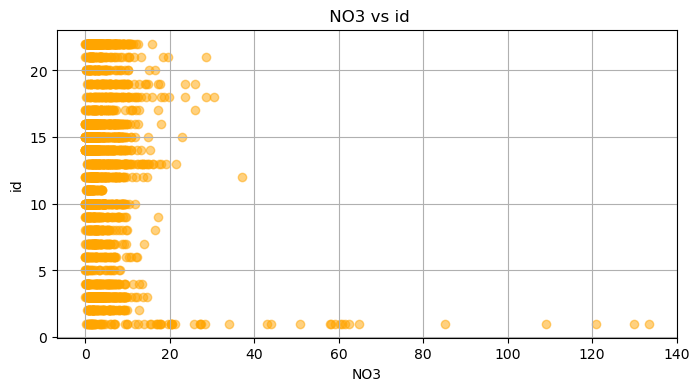

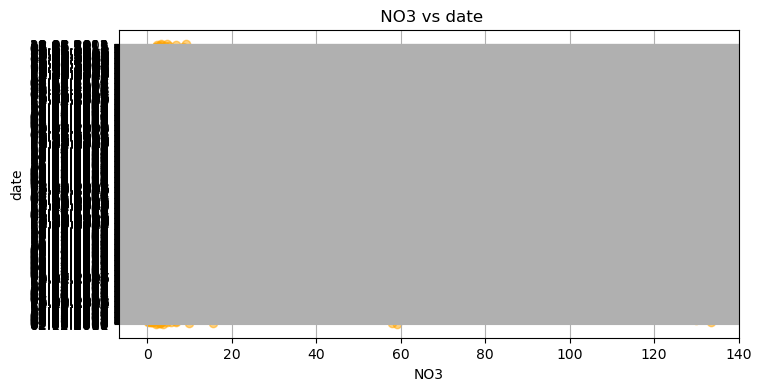

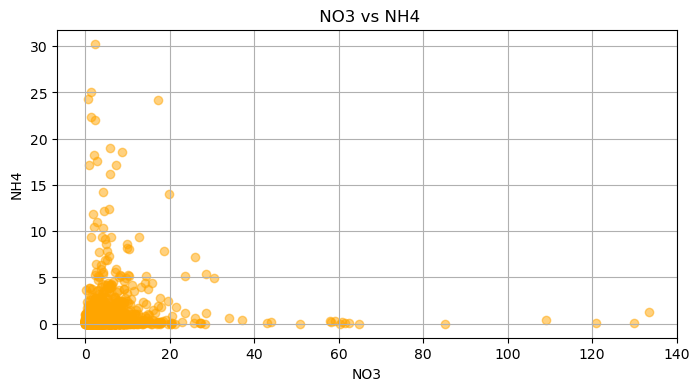

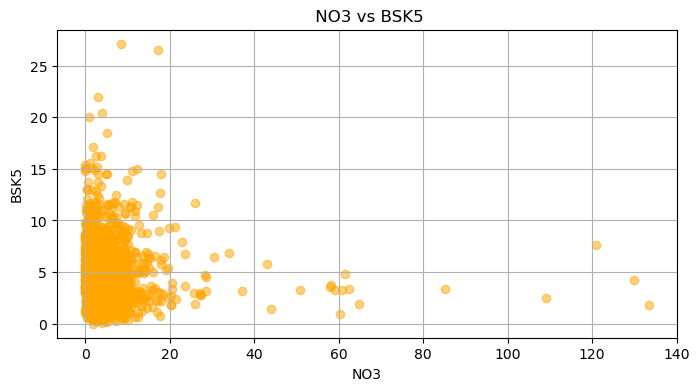

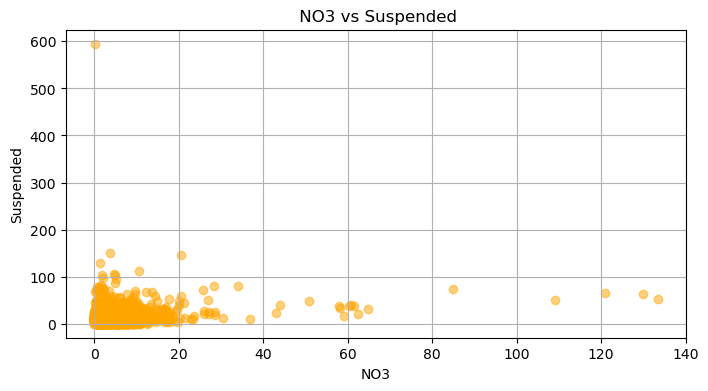

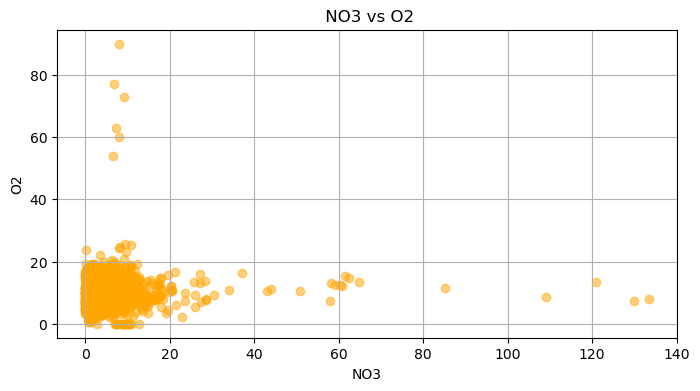

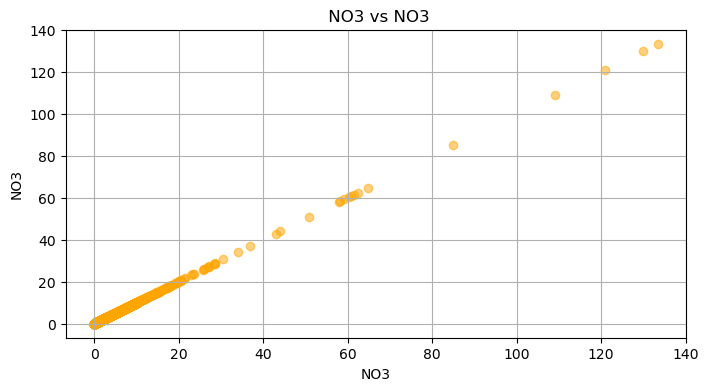

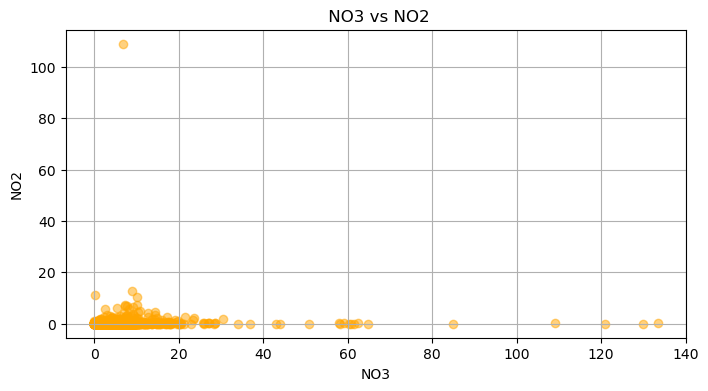

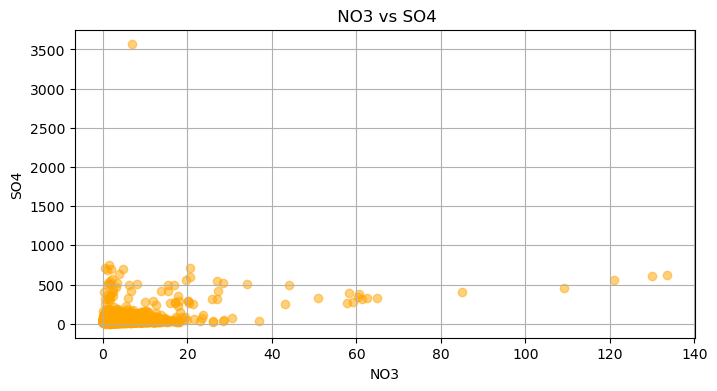

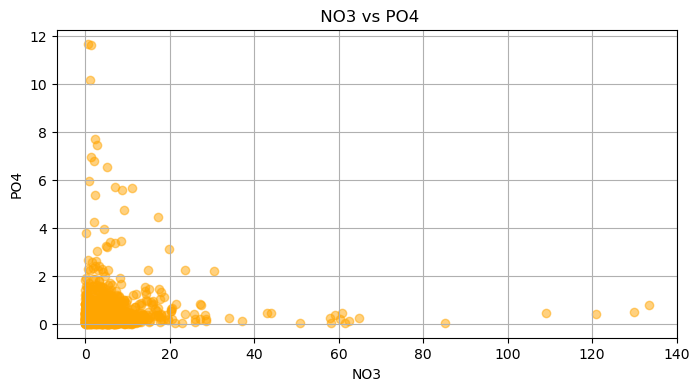

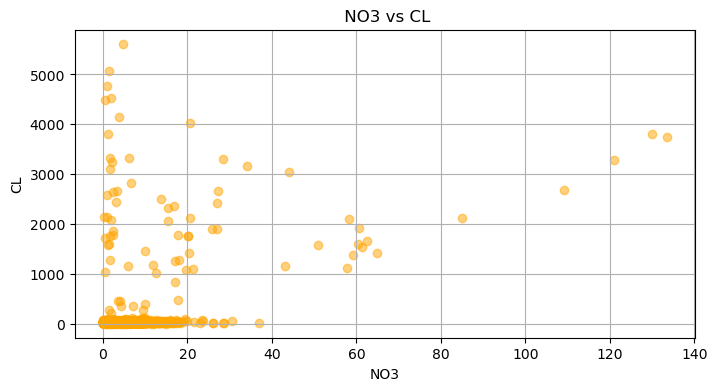

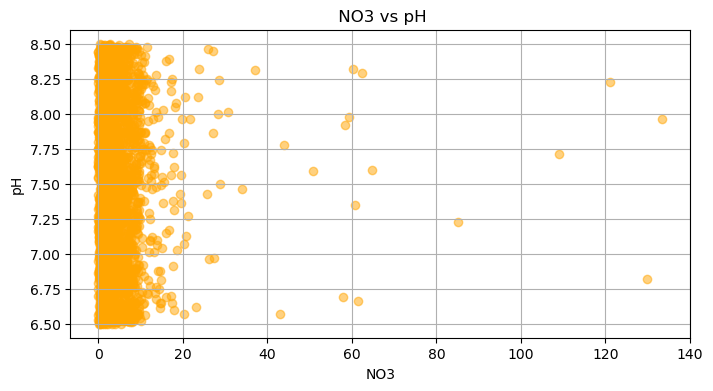

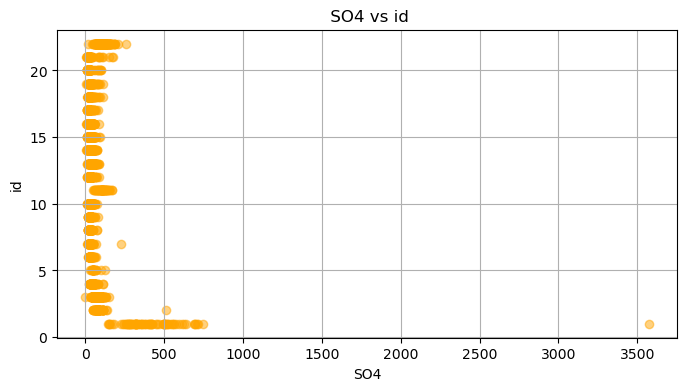

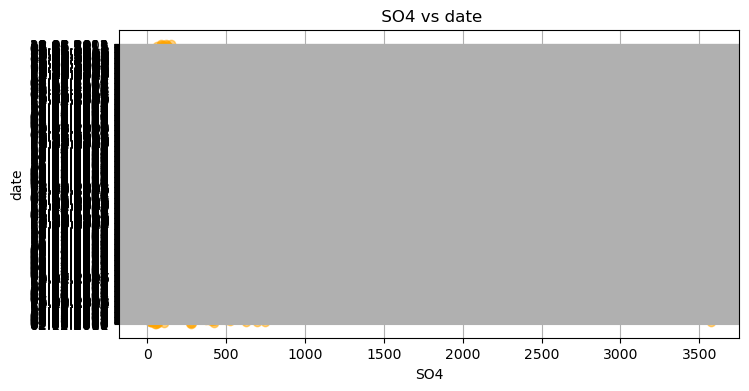

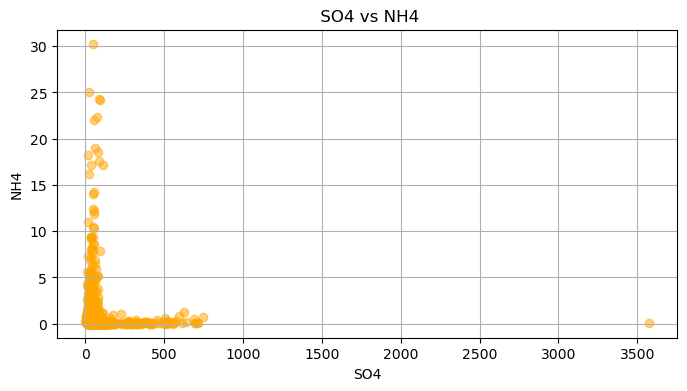

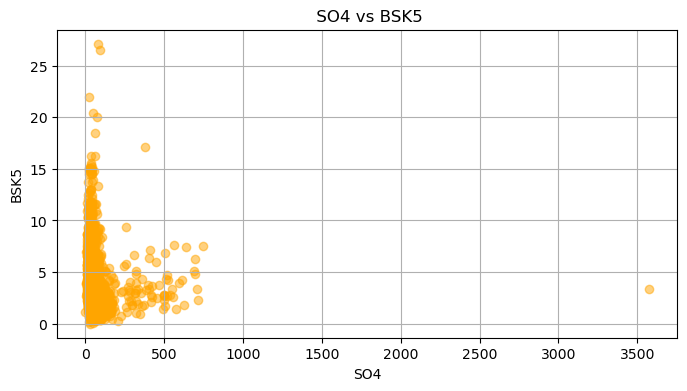

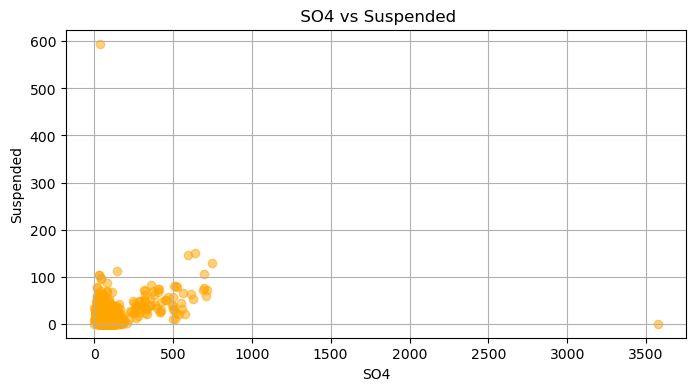

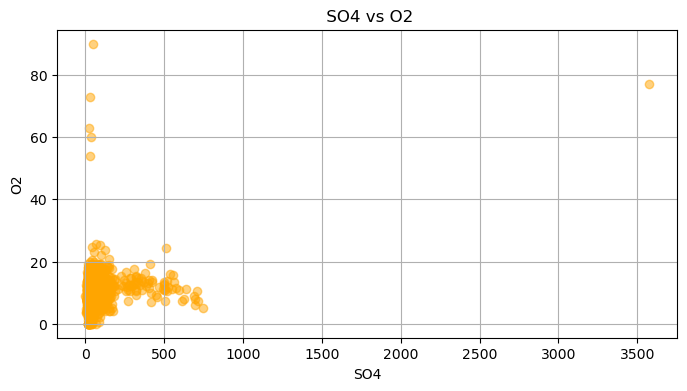

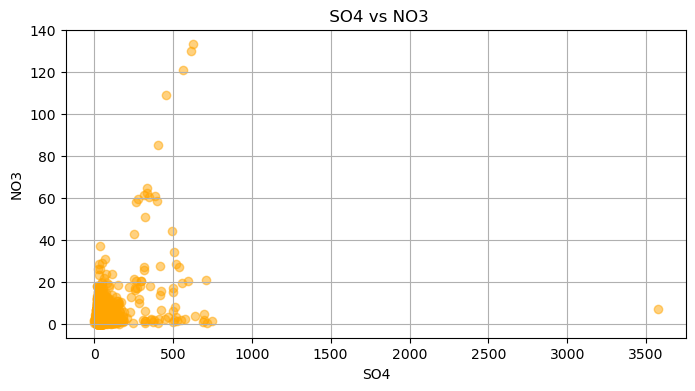

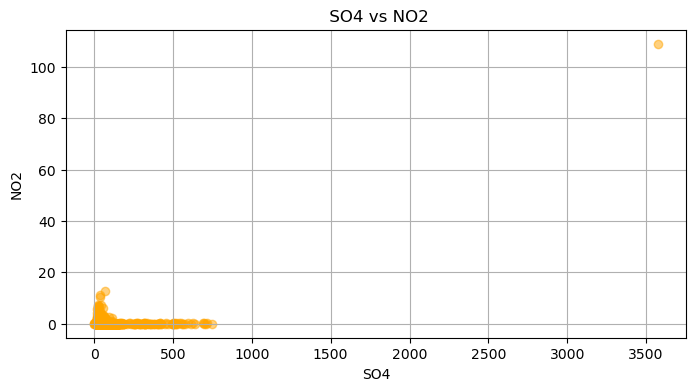

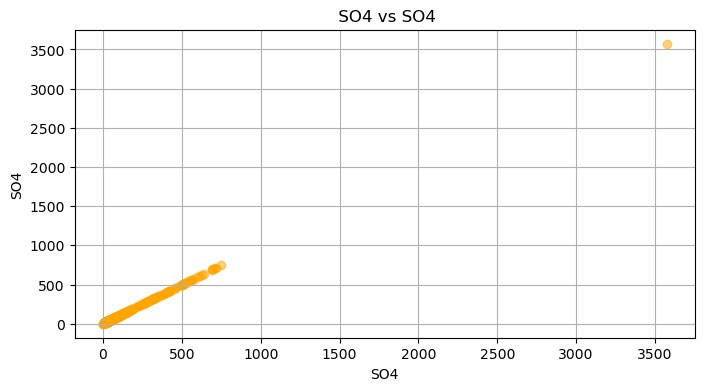

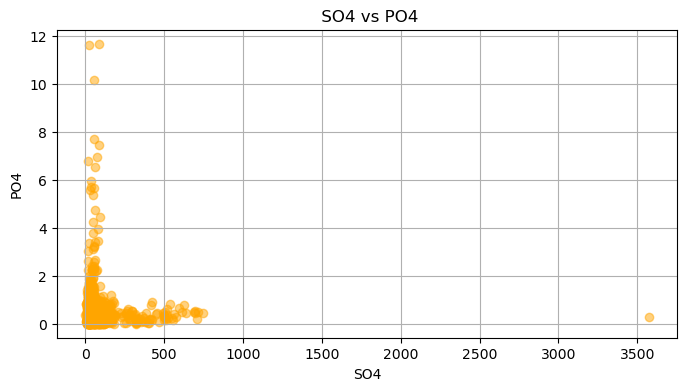

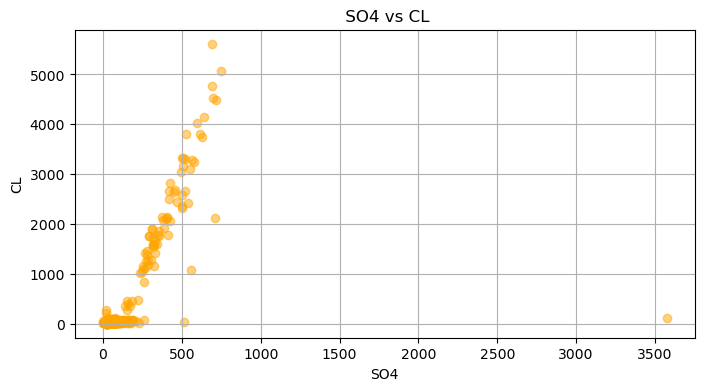

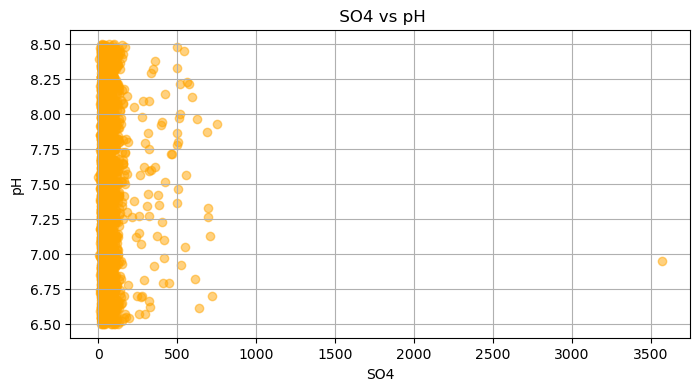

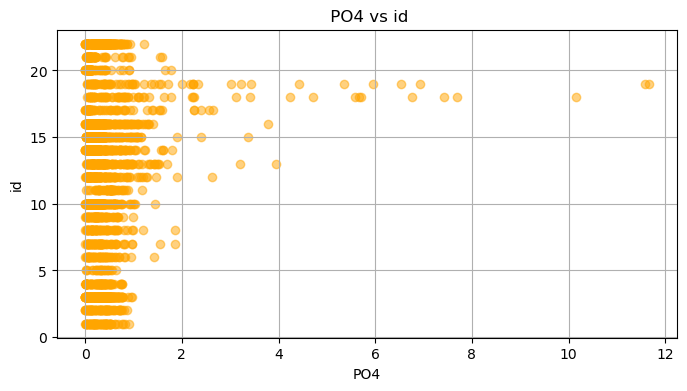

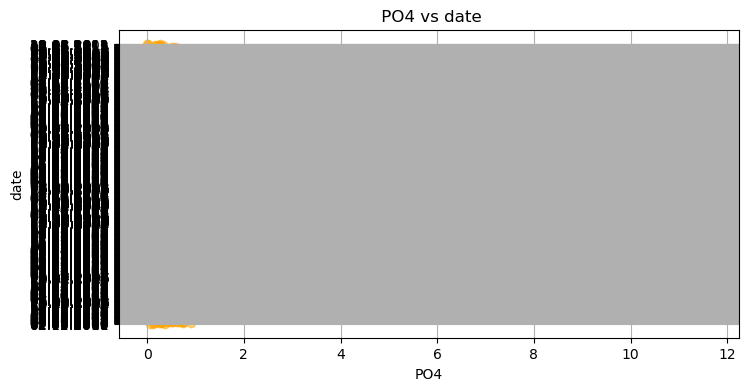

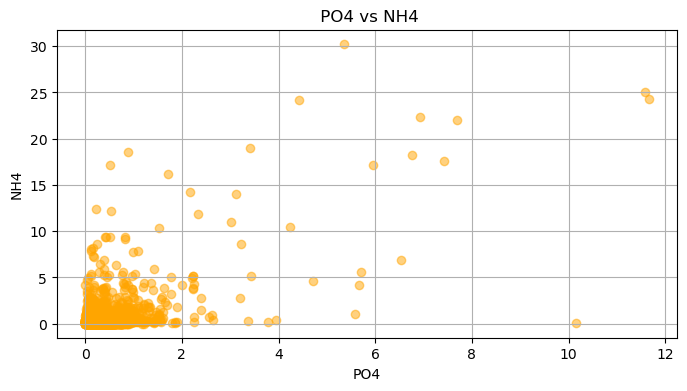

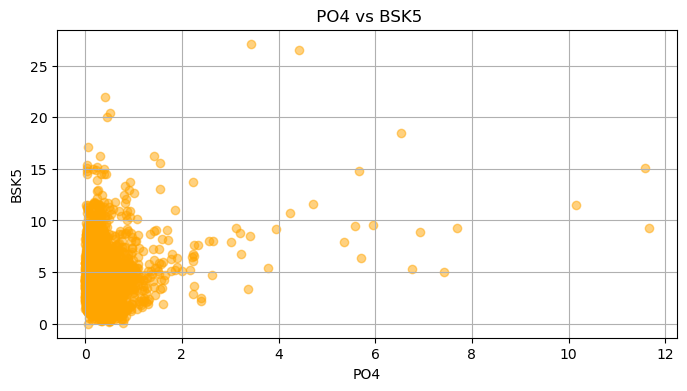

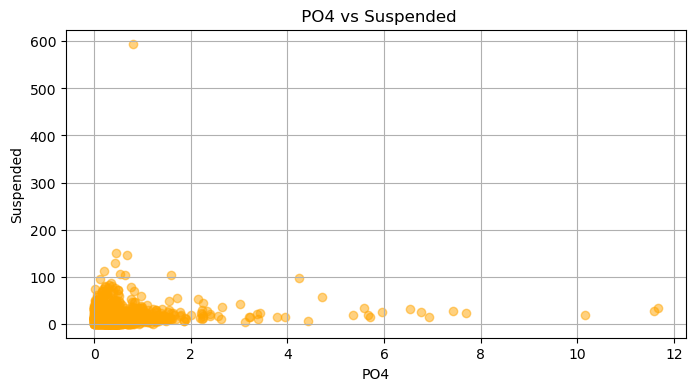

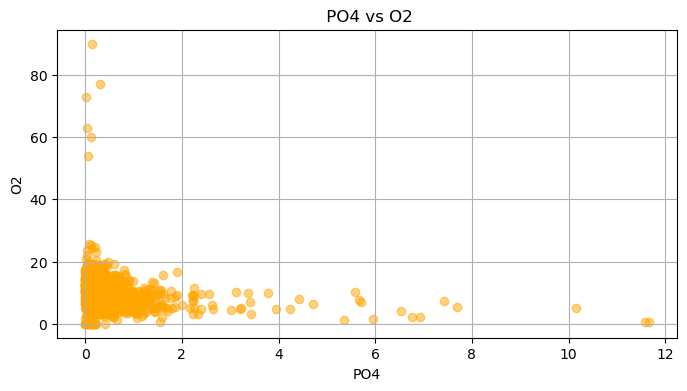

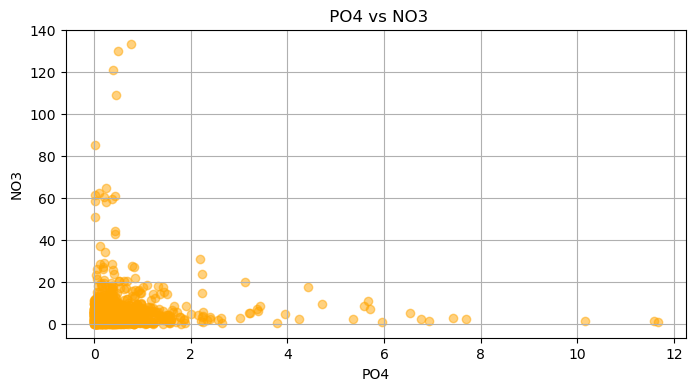

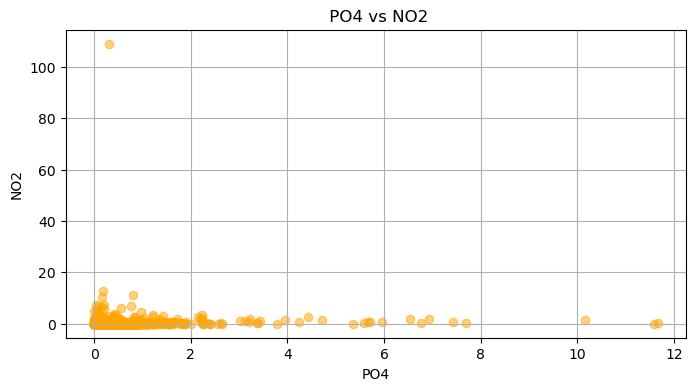

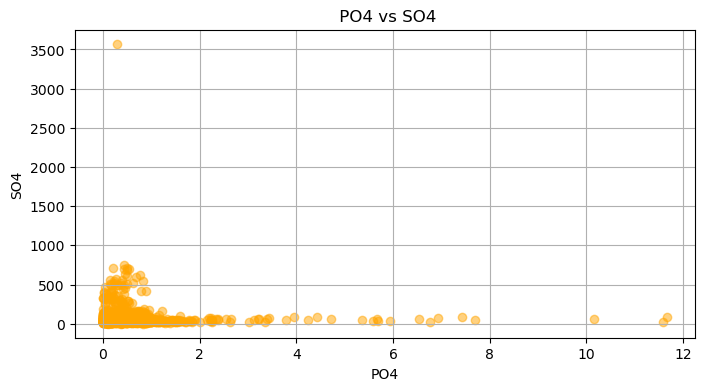

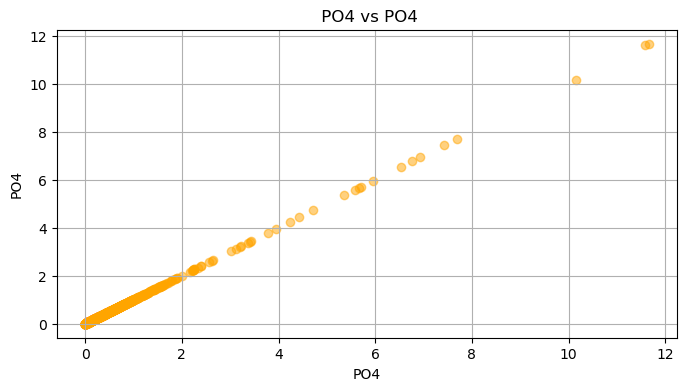

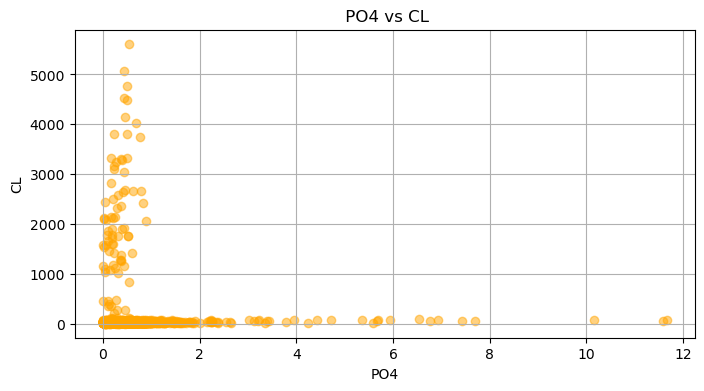

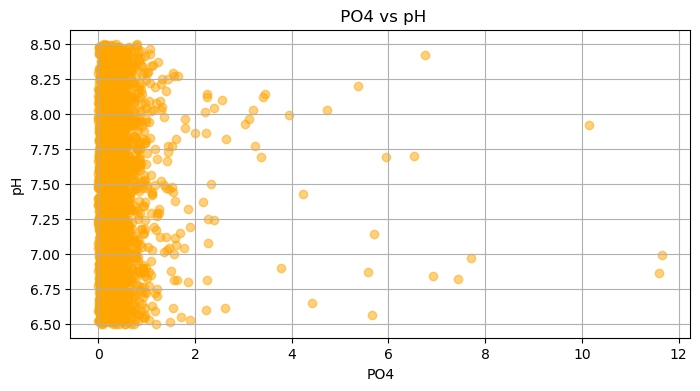

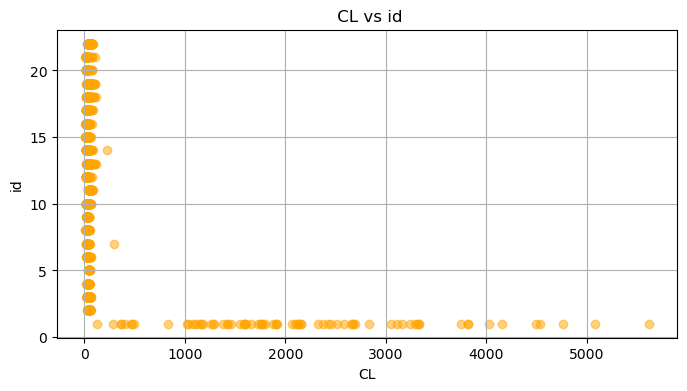

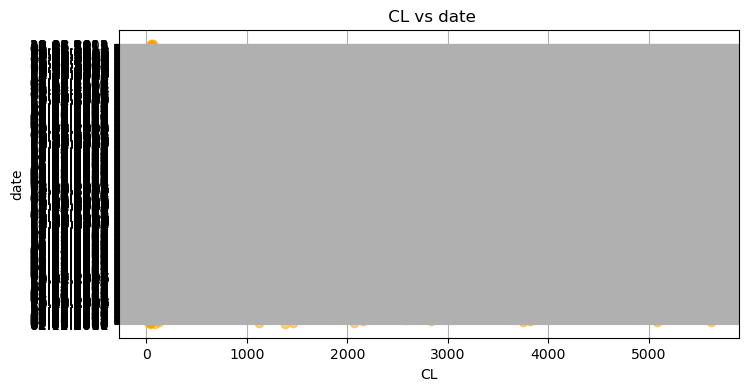

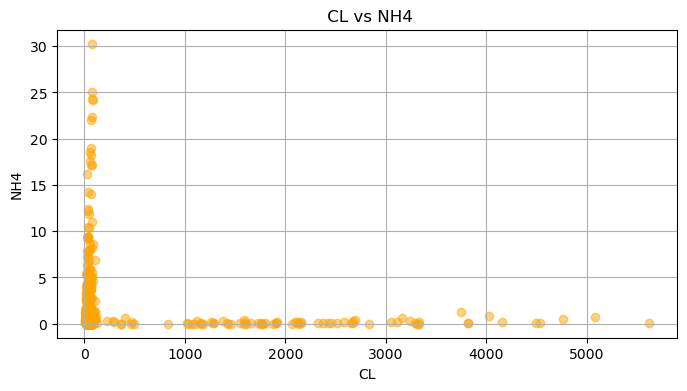

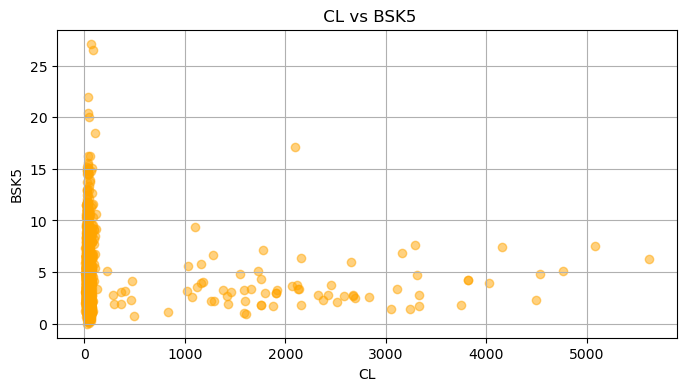

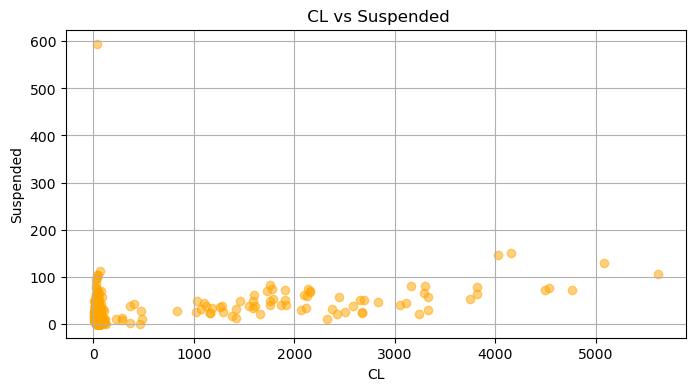

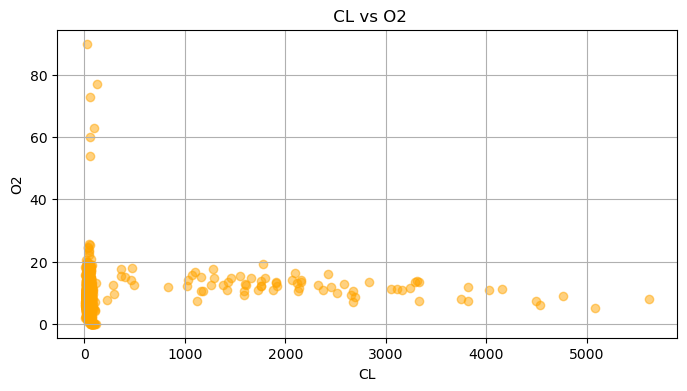

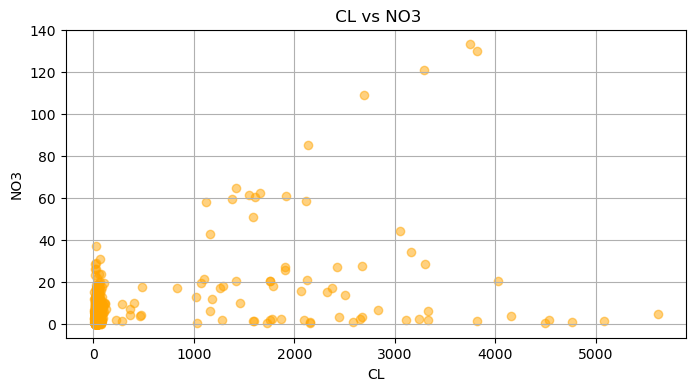

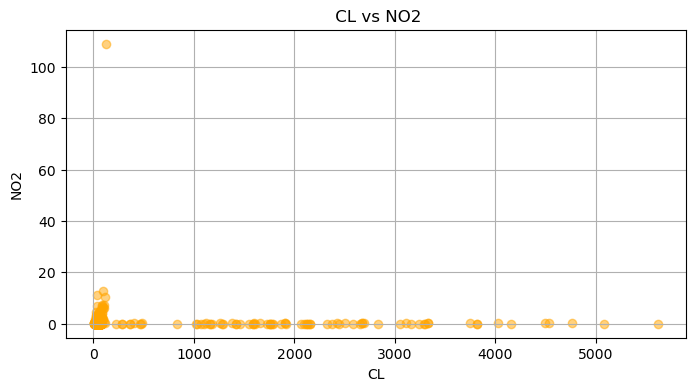

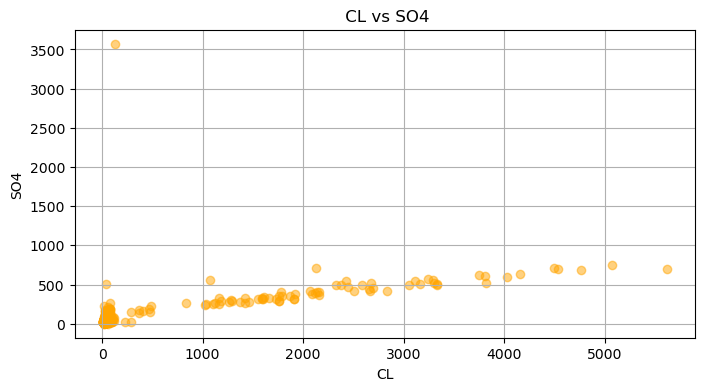

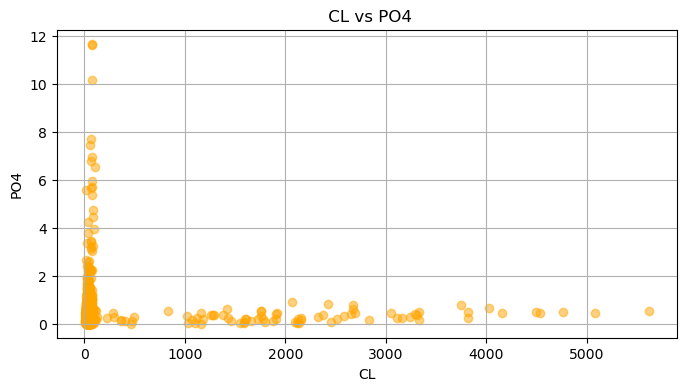

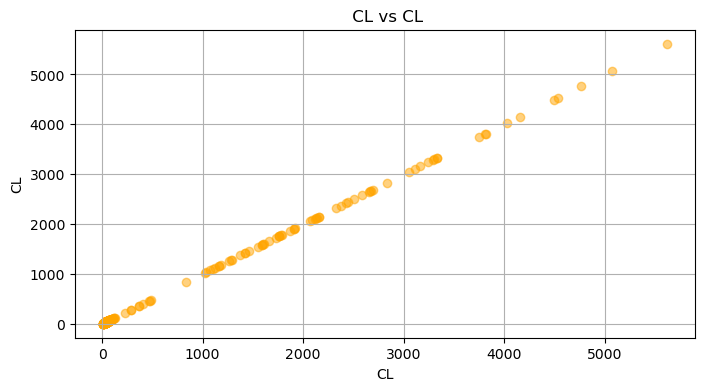

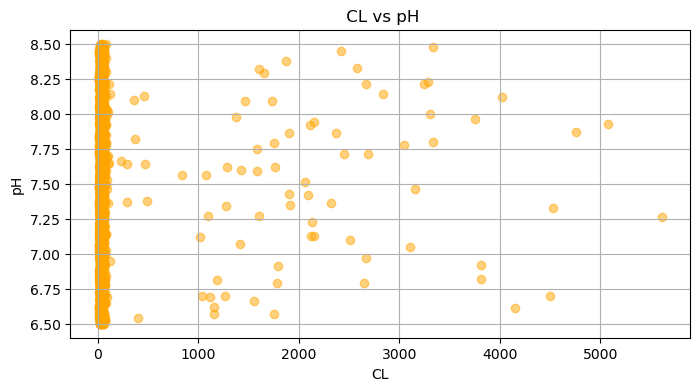

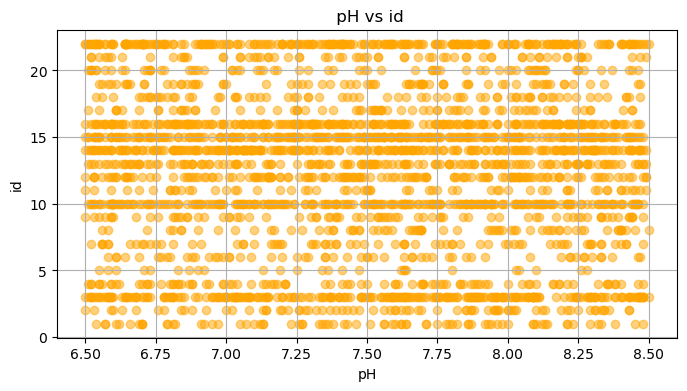

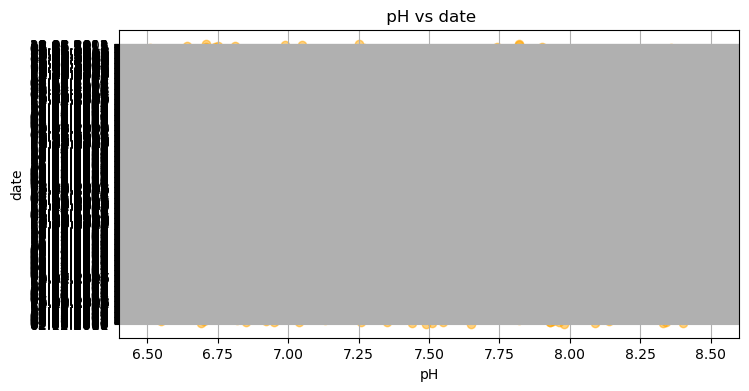

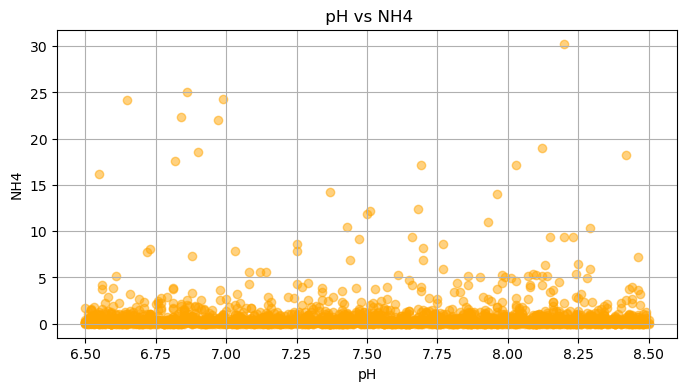

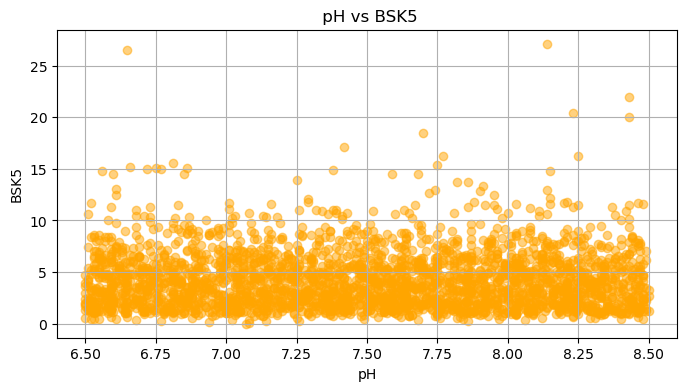

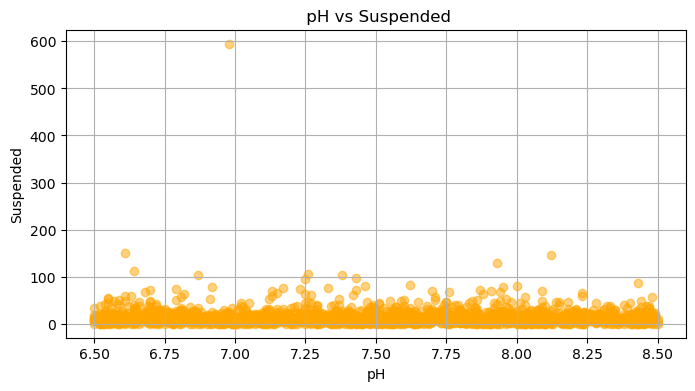

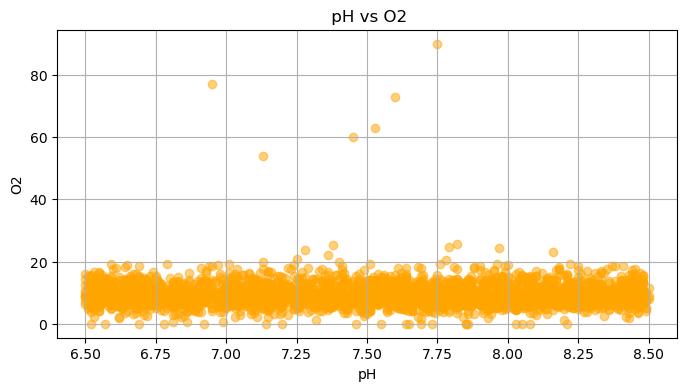

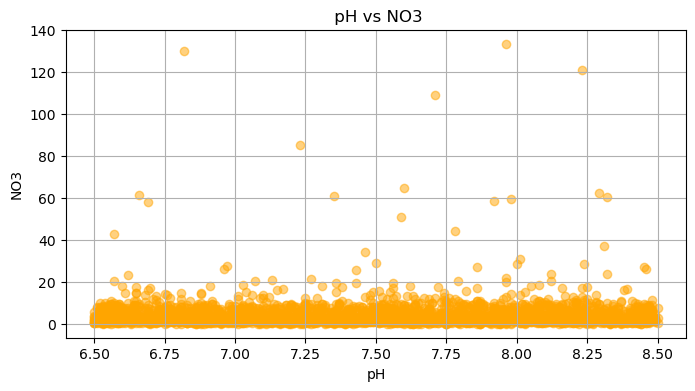

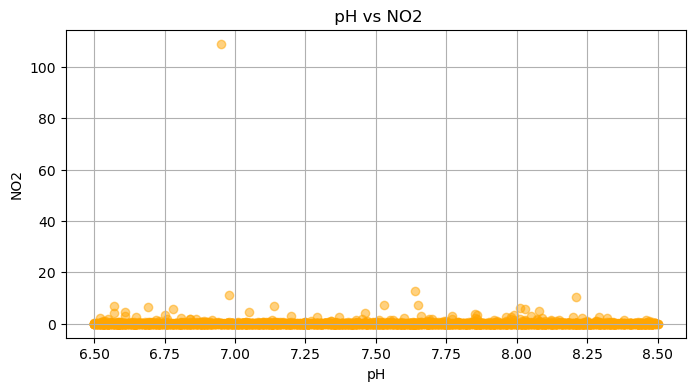

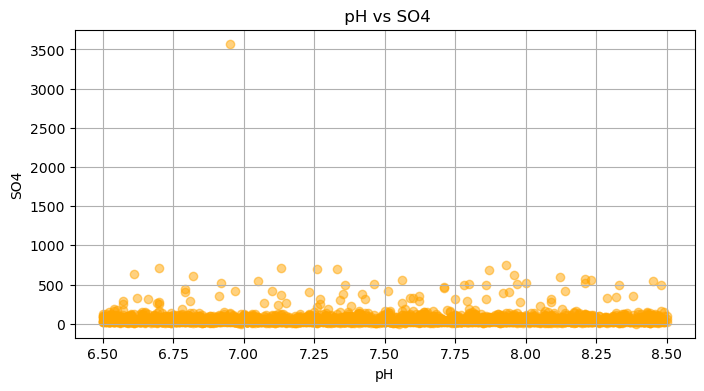

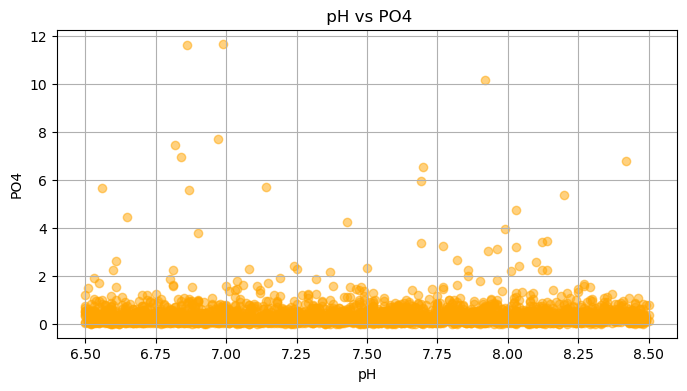

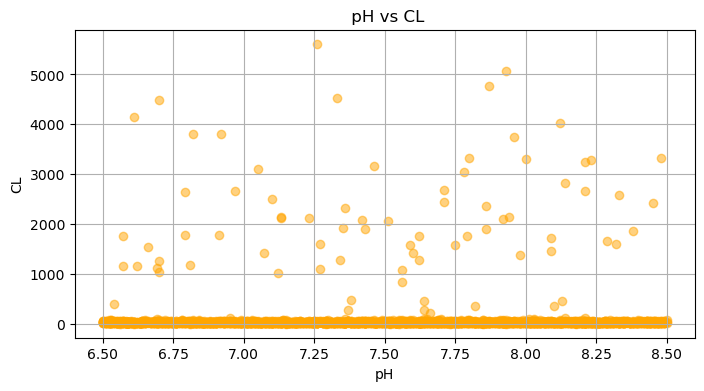

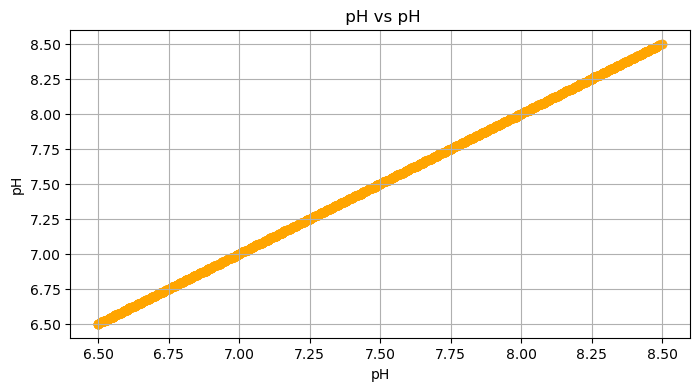

In [85]:

#Scatter plot
extra_pollutants=[i for i in Index if i not in pollutants]
for j in extra_pollutants:
    for i in Index:
        if i!=pollutants:
            plt.figure(figsize=(8,4))
            plt.scatter(df[j],df[i],color='orange',alpha=0.5)
            plt.title(f" {j} vs {i}")
            plt.xlabel(j)
            plt.ylabel(i)
            plt.grid(True)
            plt.show()

In [91]:
 model=MultiOutputRegressor(RandomForestRegressor(n_estimators=100,random_state=42))
model.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [93]:

y_pred=model.predict(X_test)

NameError: name 'X_test' is not defined